In [2129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import KBinsDiscretizer,OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score,precision_score, recall_score
from imblearn.combine import SMOTEENN,SMOTETomek
from imblearn.pipeline import make_pipeline

In [2130]:
df = pd.read_csv('loan.csv')

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\129683778.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan.csv')


In [2131]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2132]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


From the data description above, it can be seen that there is a highly significant values of missing data. Let's explore the missing data first.

In [2133]:
df_null = pd.DataFrame({'No. of null values': df.isnull().sum(),
                        '% of null values':100*(df.isnull().sum()/len(df))
                       })
df_null[df_null['No. of null values']>0].head(60)

,No. of null values,% of null values
emp_title,2459,6.191303
emp_length,1075,2.706650
desc,12940,32.580507
title,11,0.027696
mths_since_last_delinq,25682,64.662487
mths_since_last_record,36931,92.985372
revol_util,50,0.125891
last_pymnt_d,71,0.178765
next_pymnt_d,38577,97.129693
last_credit_pull_d,2,0.005036


In [2134]:
df_null[df_null['No. of null values']>0].tail(8)

,No. of null values,% of null values
pct_tl_nvr_dlq,39717,100.000000
percent_bc_gt_75,39717,100.000000
pub_rec_bankruptcies,697,1.754916
tax_liens,39,0.098195
tot_hi_cred_lim,39717,100.000000
total_bal_ex_mort,39717,100.000000
total_bc_limit,39717,100.000000
total_il_high_credit_limit,39717,100.000000


Removes the columns with more than 60% of the missing data as it's hard to impute a l large amount of values based on assumptions.

In [2135]:
threshold=60
columns_to_drop = df_null[df_null['% of null values']>threshold].index
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [2136]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Target Variable : loan_status

<AxesSubplot:>

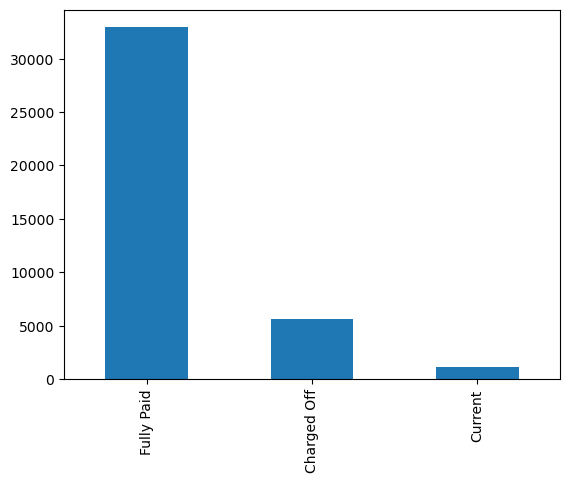

In [2137]:
#Target Variable
df['loan_status'].value_counts().plot(kind='bar')

In [2138]:
df1=df[(df['loan_status']=='Fully Paid')| (df['loan_status']=='Charged Off')]
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [2139]:
df1.shape

(38577, 54)

In [2140]:
df1['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [2141]:
df1['loan_status'] = df1['loan_status'].astype('category').cat.codes

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\2785820432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['loan_status'] = df1['loan_status'].astype('category').cat.codes


## Data Cleaning

In [2142]:
df1.columns

C:\Users\MUH0351\Anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

### Numerical Data

In [2143]:
numeric_feats = df1._get_numeric_data()
numeric_feats.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [2144]:
numeric_feats.isnull().mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
installment                   0.000000
annual_inc                    0.000000
loan_status                   0.000000
dti                           0.000000
delinq_2yrs                   0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
total_acc                     0.000000
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
collections_12_mths_ex_me

In [2145]:
# as few of columns have missing values, so the rows with the missing data would be dropped.
numeric_feats.dropna(inplace=True)

#### id, member_id  
id: A unique LC assigned ID for the loan listing.  
member_id: A unique LC assigned Id for the borrower member.

In [2146]:
df1.drop(['id','member_id'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\2676543009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['id','member_id'], axis=1, inplace=True)


#### loan_amnt  
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [2147]:
df1['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

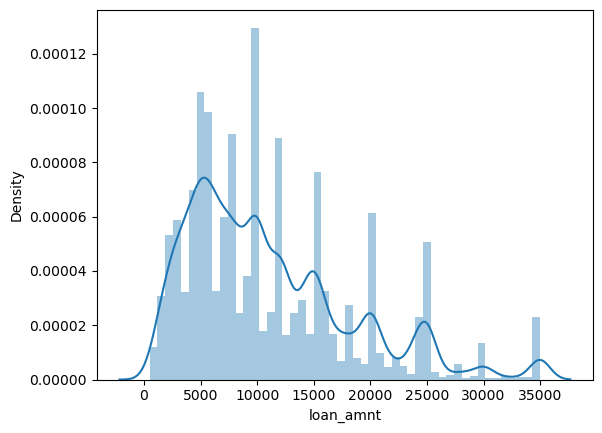

In [2148]:
sns.distplot(df1['loan_amnt'])

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

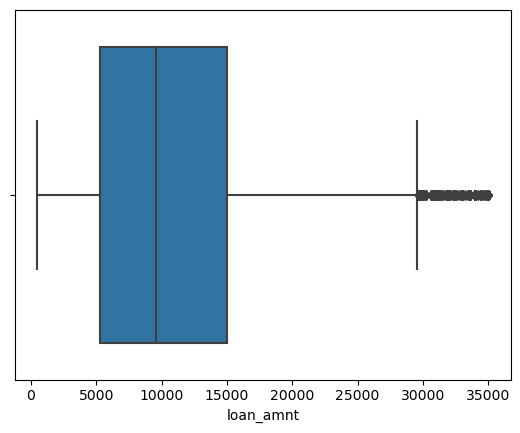

In [2149]:
sns.boxplot(df1['loan_amnt'])

### funded_amnt  
The total amount committed to that loan at that point in time.

In [2150]:
df1['funded_amnt'].describe()

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

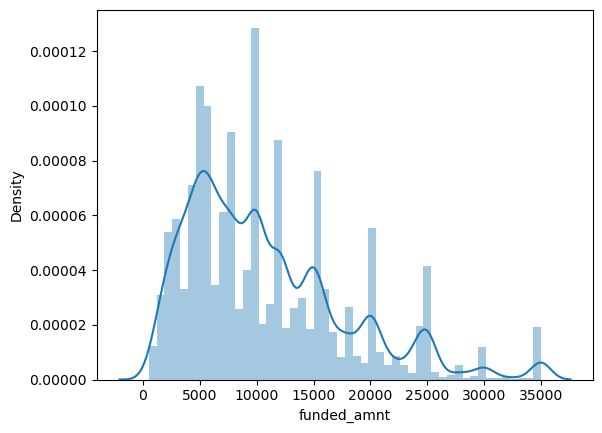

In [2151]:
sns.distplot(df1['funded_amnt'])

### funded_amnt_inv  
funded_amnt_inv: The total amount committed by investors for that loan at that point in time.

In [2152]:
df1['funded_amnt_inv'].describe()

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='funded_amnt_inv', ylabel='Density'>

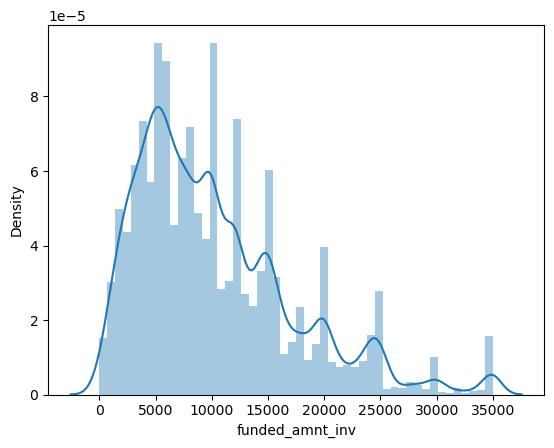

In [2153]:
sns.distplot(df1['funded_amnt_inv'])

The distribution plot of loan_amnt, funded_amnt and funded_amnt_inv nearly show the same data distribution. Therefore, lets check the correlation between these features.

In [2154]:
np.corrcoef(df1['funded_amnt'],df1['funded_amnt_inv'])

array([[1.        , 0.95617165],
       [0.95617165, 1.        ]])

In [2155]:
np.corrcoef(df1['funded_amnt'],df1['loan_amnt'])

array([[1.        , 0.98178962],
       [0.98178962, 1.        ]])

As loan_amnt, funded_amnt and funded_amnt_inv are directly corelated to each other. Therefore, loan_amnt will be kept and others two will be dropped as those won't add any extra value in the analysis.

In [2156]:
df1.drop(['funded_amnt','funded_amnt_inv'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\470532623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['funded_amnt','funded_amnt_inv'], axis=1, inplace=True)


### int_rate 
int_rate: Represents the interest Rate on the loan.

In [2157]:
df1['int_rate'].unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '7.90%', '18.64%',
       '21.28%', '12.69%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '20.89%',
       '20.30%', '23.91%', '19.03%', '23.13%', '22.74%', '22.35%',
       '22.06%', '24.11%', '6.00%', '23.52%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '19.29%', '13.99%', '18.39%', '16.89%',
       '17.99%', '20.99%', '22.85%', '19.69%', '20.62%', '20.25%',
       '21.36%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

In [2158]:
# Remove the % sign and change its type to integer
df1['int_rate'] = [str(i).replace('%','').strip() for i in df1['int_rate']]
df1['int_rate'] = pd.to_numeric(df1['int_rate'], errors='coerce', downcast='float')

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\1322356232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['int_rate'] = [str(i).replace('%','').strip() for i in df1['int_rate']]
C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\1322356232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['int_rate'] = pd.to_numeric(df1['int_rate'], errors='coerce', downcast='float')


C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int_rate', ylabel='Density'>

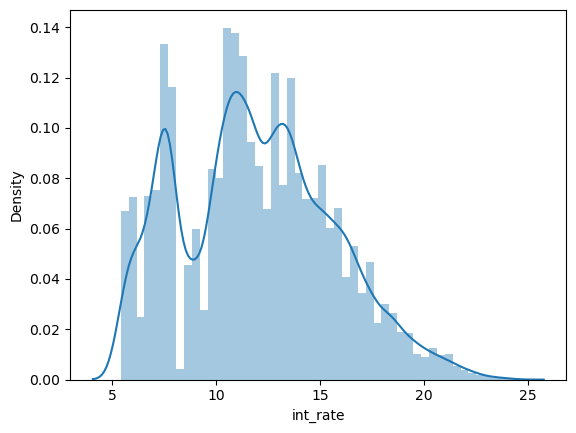

In [2159]:
sns.distplot(df1['int_rate'])

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

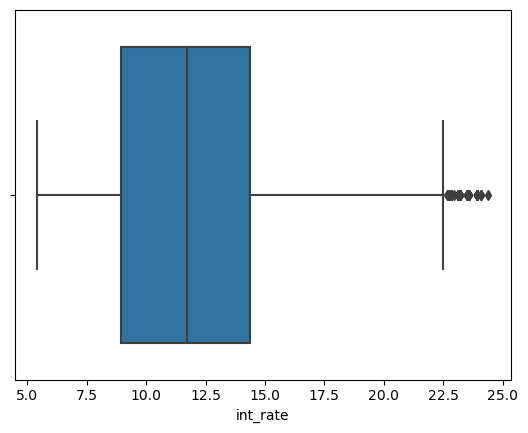

In [2160]:
sns.boxplot(df1['int_rate'])

There are some outliers which will be treated using IQR.

### Capping outliers using IQR:

In [2161]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [2162]:
int_rate_upper_limit,int_rate_lower_limit = find_skewed_boundaries(df1,'int_rate',1.5)

In [2163]:
df1['int_rate'] = np.where(df1['int_rate']>int_rate_upper_limit, int_rate_upper_limit, df1['int_rate'])

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\4038527249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['int_rate'] = np.where(df1['int_rate']>int_rate_upper_limit, int_rate_upper_limit, df1['int_rate'])


C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int_rate', ylabel='Density'>

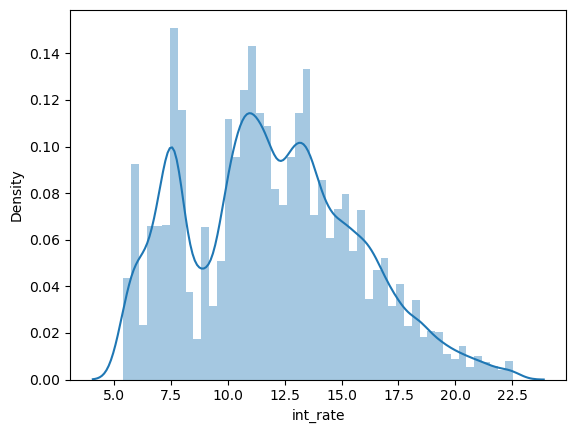

In [2164]:
sns.distplot(df1['int_rate'])

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

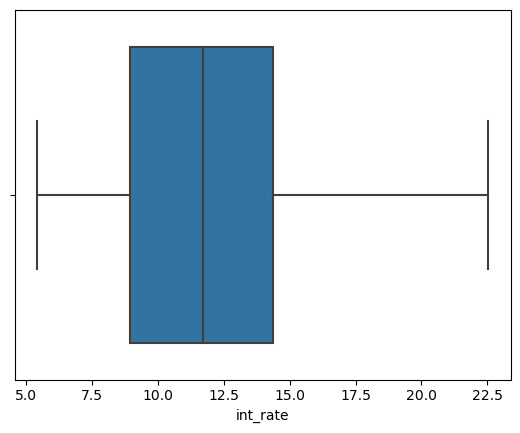

In [2165]:
sns.boxplot(df1['int_rate'])

### annual_inc  
annual_inc: The self-reported annual income provided by the borrower during registration.

In [2166]:
df1['annual_inc'].unique()

array([24000., 30000., 12252., ..., 33990., 36153., 27376.])

In [2167]:
df1['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

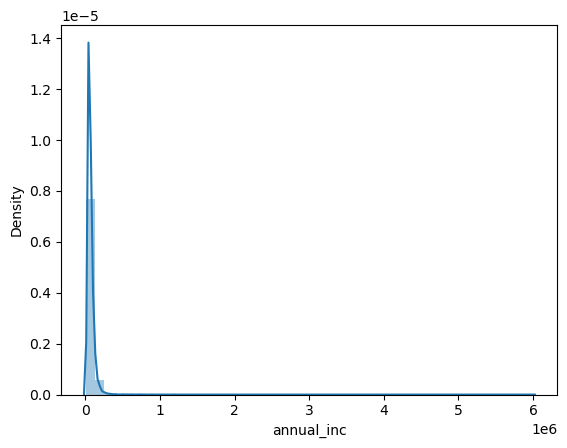

In [2168]:
sns.distplot(df1['annual_inc'])

### pymnt_plan
pymnt_plan: Indicates if a payment plan has been put in place for the loan

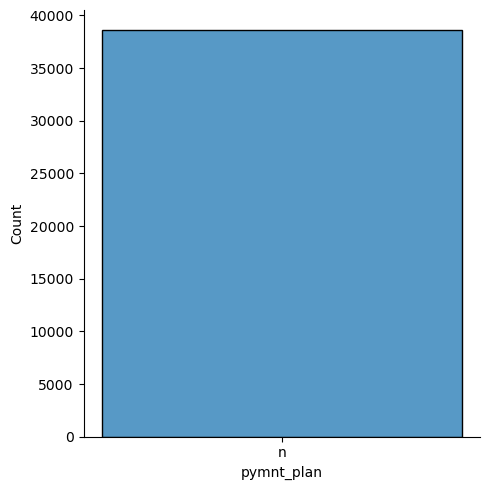

In [2169]:
sns.displot(df1['pymnt_plan'])

As pymnt_plan is a constant variable having a signle value, it won't have any effect on the target variable. So, it will be dropped.

In [2170]:
df1.drop(['pymnt_plan'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\1910222897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['pymnt_plan'], axis=1, inplace=True)


### desc  
desc: Loan description provided by the borrower

In [2171]:
df1['desc'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      209
Debt Consolidation                                                                                                                                                                                                                                                                                                                                                            

As description feature expalins the purpose of the loan, and there is already a purpose column, therefore, this will be dropped.

In [2172]:
df1.drop(['desc'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\543003208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['desc'], axis=1, inplace=True)


### zip_code  
The first 3 numbers of the zip code provided by the borrower in the loan application.

In [2173]:
df1['zip_code'].value_counts()

100xx    583
945xx    531
112xx    502
606xx    493
070xx    455
        ... 
463xx      1
381xx      1
592xx      1
414xx      1
469xx      1
Name: zip_code, Length: 822, dtype: int64

zip_code does not provides any information, so it will be dropped.

In [2174]:
df1.drop(['zip_code'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\3304208852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['zip_code'], axis=1, inplace=True)


### dti  
dti:A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [2175]:
df1['dti'].value_counts()

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
28.95      1
25.85      1
25.77      1
27.20      1
25.43      1
Name: dti, Length: 2853, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dti', ylabel='Density'>

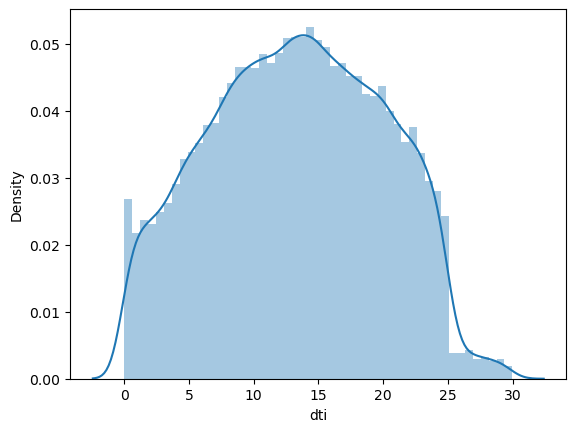

In [2176]:
sns.distplot(df1['dti'])

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dti'>

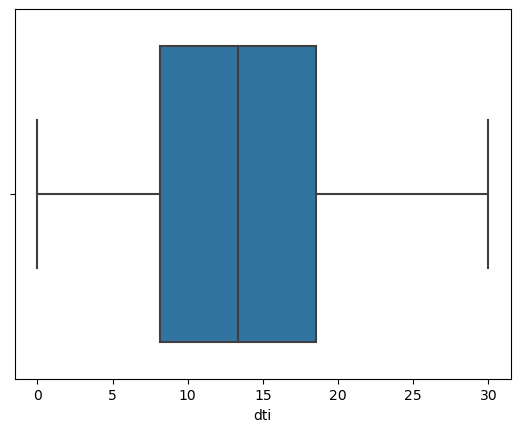

In [2177]:
sns.boxplot(df1['dti'])

### delinq_2yrs  
deling_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [2178]:
df1['delinq_2yrs'].value_counts()

0     34386
1      3207
2       673
3       212
4        60
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

In [2179]:
df['delinq_2yrs'].unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11], dtype=int64)

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delinq_2yrs', ylabel='Density'>

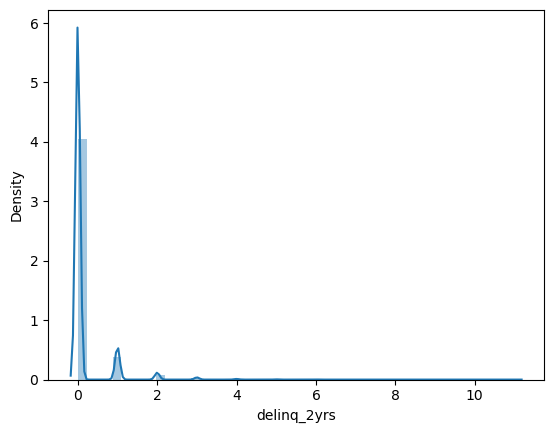

In [2180]:
sns.distplot(df1['delinq_2yrs'])

### earliest_cr_line  
earliest_cr_line: The month the borrower's earliest reported credit line was opened

In [2181]:
df1['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Nov-04', 'Jul-05',
       'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89', 'Jul-03',
       'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03', 'Jan-01',
       'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01', 'Feb-02',
       'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Apr-05', 'Oct-07',
       'Dec-00', 'Apr-07', 'Jan-03', 'Mar-94', 'Sep-98', 'Jun-04',
       'Nov-95', 'Jul-99', 'Jun-95', 'Sep-92', 'Jan-02', 'Apr-92',
       'Oct-06', 'May-00', 'Dec-98', 'Dec-04', 'Oct-00', 'May-02',
       'May-06', 'Jul-02', 'Jul-06', 'May-97', 'Oct-05', 'Apr-95',
       'Oct-02', 'Jan-00', 'Apr-00', 'Dec-94', 'Sep-05', 'Dec-84',
       'Dec-99', 'Nov-03', 'Jun-89', 'Jun-03', 'Oct-96', 'May-03',
       'Jun-02', 'Jun-07', 'Dec-96', 'Sep-02', 'Jan-86', 'May-98',
       'Jan-97', 'Jun-05', 'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94',
       'Jun-92', 'Mar-97', 'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00',
       'Feb-01', 'Dec-88', 'Feb-99', 'Dec-91', 'Aug-00', 'Oct-

In [2182]:
df1.drop(['earliest_cr_line'], inplace=True, axis=1)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\3557630520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['earliest_cr_line'], inplace=True, axis=1)


#### open_acc  
open_acc: The number of open credit lines in the borrower's credit file.

In [2183]:
df1['open_acc'].unique()

array([ 3,  2, 10,  9,  7,  4, 11, 14, 12, 20,  8,  6, 15, 17,  5, 13, 16,
       30, 21, 18, 19, 27, 23, 34, 25, 22, 24, 26, 32, 28, 29, 33, 31, 39,
       35, 36, 38, 44, 41, 42], dtype=int64)

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='open_acc', ylabel='Density'>

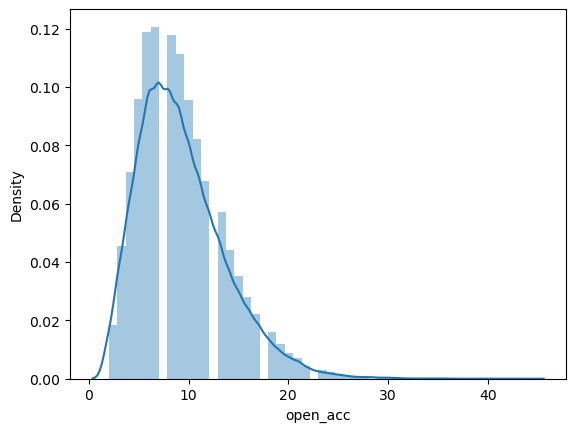

In [2184]:
sns.distplot(df1['open_acc'])

In [2185]:
df1['open_acc'].describe()

count    38577.000000
mean         9.275423
std          4.401588
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

### pub_rec  
pub_rec: Number of derogatory public records

In [2186]:
df1['pub_rec'].value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pub_rec', ylabel='Density'>

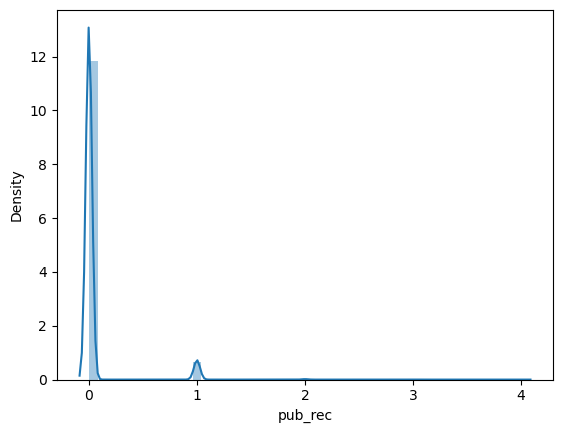

In [2187]:
sns.distplot(df1['pub_rec'])

### pub_rec_bankruptcies  
pub_rec_bankruptcies : Number of public record bankruptcies

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Density'>

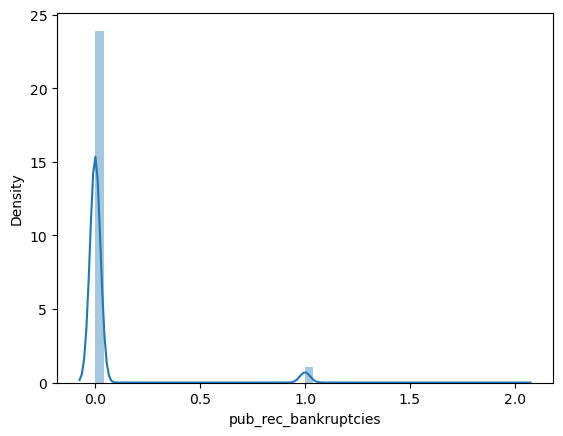

In [2188]:
sns.distplot(df1['pub_rec_bankruptcies'])

In [2189]:
df1['pub_rec_bankruptcies'].isnull().mean()

0.018067760582730644

In [2190]:
df1.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\843036605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['pub_rec_bankruptcies'], inplace=True)


### revol_bal
revol_bal: Total credit revolving balance

In [2191]:
df1['revol_bal'].unique()

array([13648,  1687,  2956, ..., 13126, 14930, 26233], dtype=int64)

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revol_bal', ylabel='Density'>

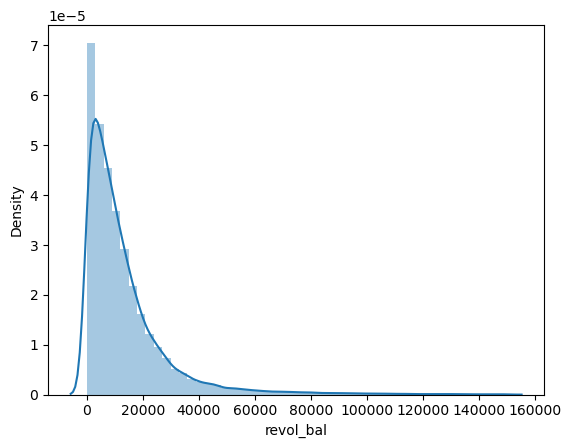

In [2192]:
sns.distplot(df1['revol_bal'])

###  revol_util
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [2193]:
df1['revol_util'].unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [2194]:
df1['revol_util'] = [str(i).replace('%','').strip() for i in df1['revol_util']]
df1['revol_util'] = pd.to_numeric(df1['revol_util'], errors='coerce', downcast='float')

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\3809057690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['revol_util'] = [str(i).replace('%','').strip() for i in df1['revol_util']]
C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\3809057690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['revol_util'] = pd.to_numeric(df1['revol_util'], errors='coerce', downcast='float')


C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revol_util', ylabel='Density'>

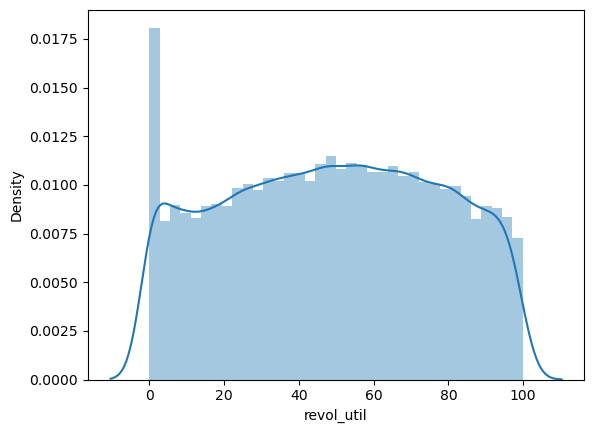

In [2195]:
sns.distplot(df1['revol_util'])

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revol_util'>

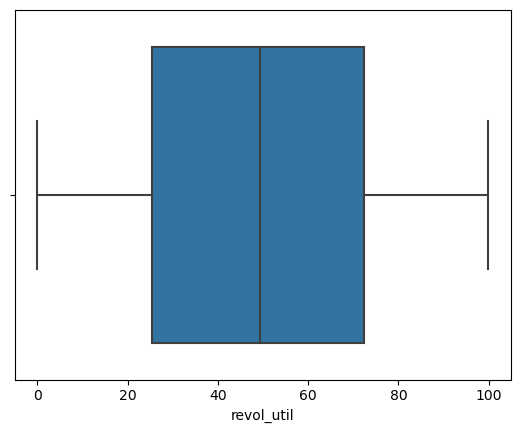

In [2196]:
sns.boxplot(df1['revol_util'])

In [2197]:
df1['revol_util'].isnull().mean()

0.0013199577613516368

In [2198]:
df1.dropna(subset=['revol_util'], inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\4151592383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['revol_util'], inplace=True)


#### total_acc

In [2199]:
df1['total_acc'].unique()

array([ 9,  4, 10, 37, 12, 11, 13,  3, 23, 34, 29, 28, 42, 14, 22, 38, 21,
       17,  7, 31, 44, 26, 16,  6, 18, 27, 25, 40, 35, 24,  8, 20, 15, 19,
       36, 51, 32, 30, 33, 46,  5, 61, 56, 50, 41, 79, 62, 43, 47, 53, 45,
       60, 55, 39, 52, 58, 54, 57, 49, 63, 48, 59, 77, 87, 75, 72, 64, 67,
       78, 76, 74, 66, 81, 90, 80, 71, 69, 73, 70, 68, 65,  2],
      dtype=int64)

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


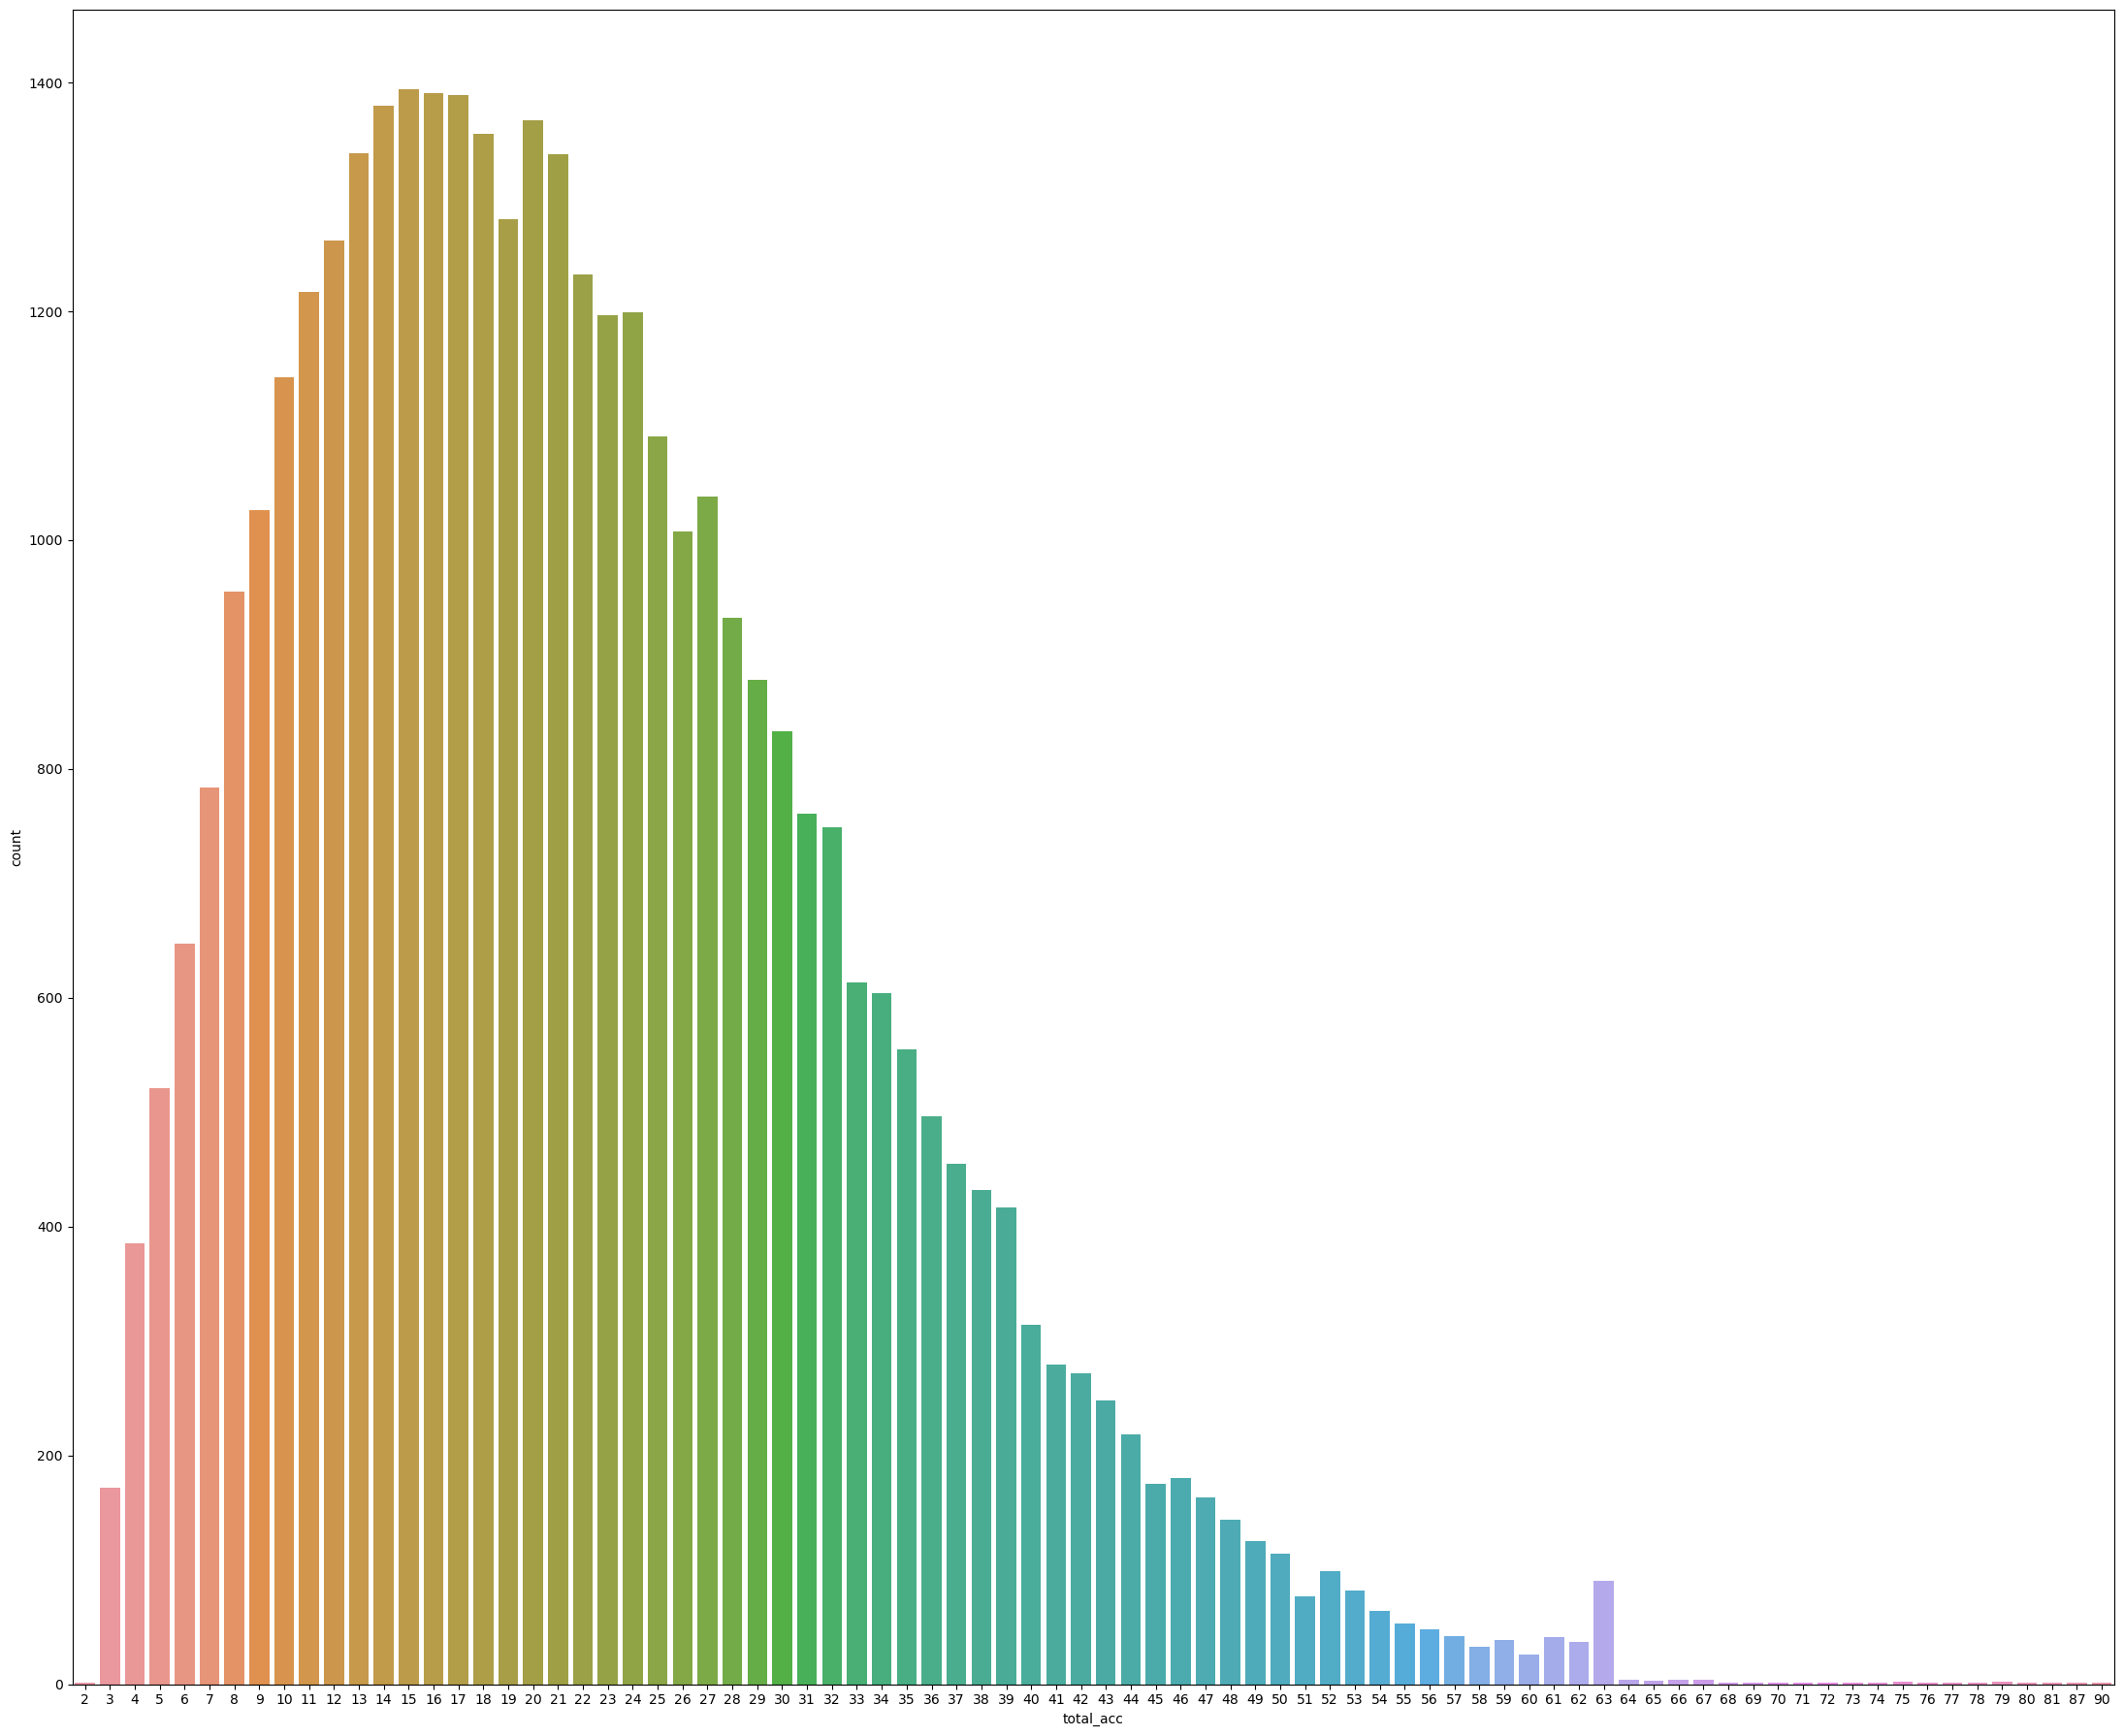

In [2200]:
fig, ax = plt.subplots(figsize=(22,18))
ax = sns.countplot(df1['total_acc'])
plt.tight_layout()
plt.show()

### initial_list_status  
The initial listing status of the loan. Possible values are – W, F

In [2201]:
df1['initial_list_status'].value_counts()

f    37830
Name: initial_list_status, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

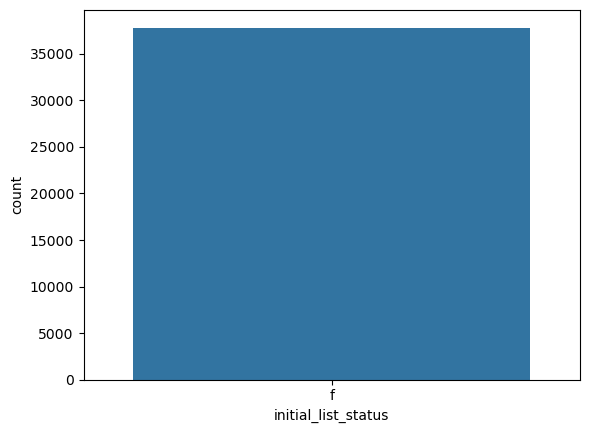

In [2202]:
sns.countplot(df1['initial_list_status'])

As, initial_list_status is a constant variable so, it contains only one variable, therefore, it's going to be dropped.

In [2203]:
df1.drop(['initial_list_status'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\2389935243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['initial_list_status'], axis=1, inplace=True)


### out_prncp
out_prncp: Remaining outstanding principal for total amount funded

In [2204]:
df1['out_prncp'].value_counts()

0.0    37830
Name: out_prncp, dtype: int64

In [2205]:
len(df1['out_prncp'])

37830

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='out_prncp', ylabel='Density'>

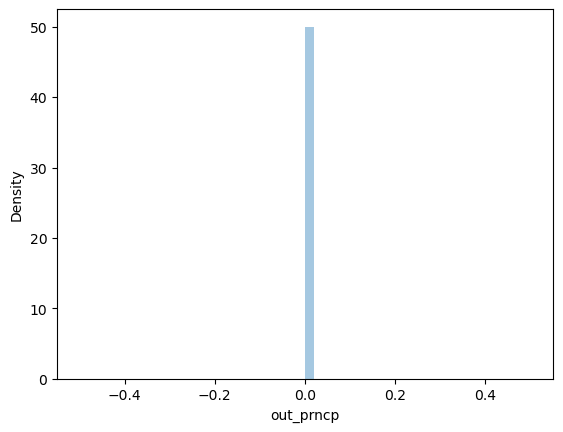

In [2206]:
sns.distplot(df1['out_prncp'])

In [2207]:
df1.drop(['out_prncp'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\2981838831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['out_prncp'], axis=1, inplace=True)


### out_prncp_inv  
out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors

In [2208]:
df1['out_prncp_inv'].value_counts()

0.0    37830
Name: out_prncp_inv, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='out_prncp_inv', ylabel='Density'>

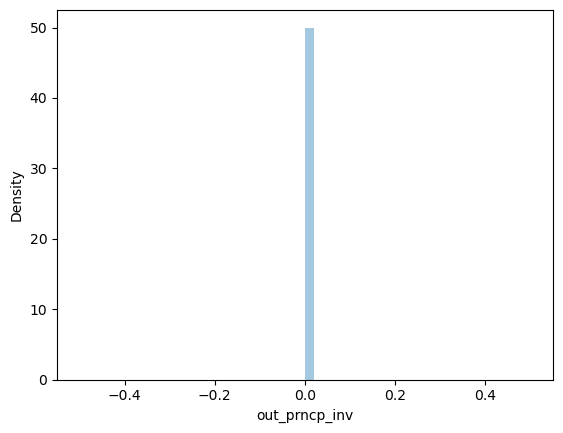

In [2209]:
sns.distplot(df1['out_prncp_inv'])

In [2210]:
df1.drop(['out_prncp_inv'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\2127021600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['out_prncp_inv'], axis=1, inplace=True)


### total_pymnt  
total_pymnt: Payments received to date for total amount funded  

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_pymnt', ylabel='Density'>

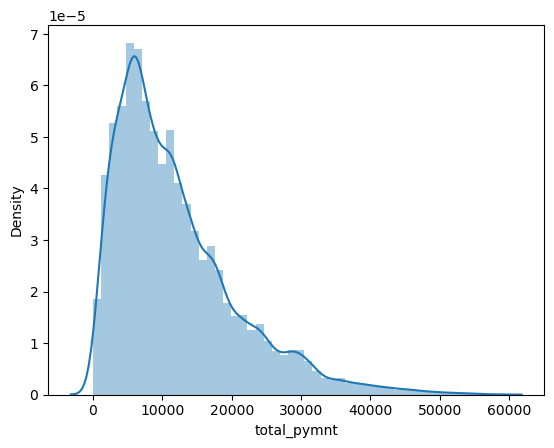

In [2211]:
sns.distplot(df1['total_pymnt'])

### total_pymnt_inv  
total_pymnt_inv: Payments received to date for portion of total amount funded by investors

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_pymnt_inv', ylabel='Density'>

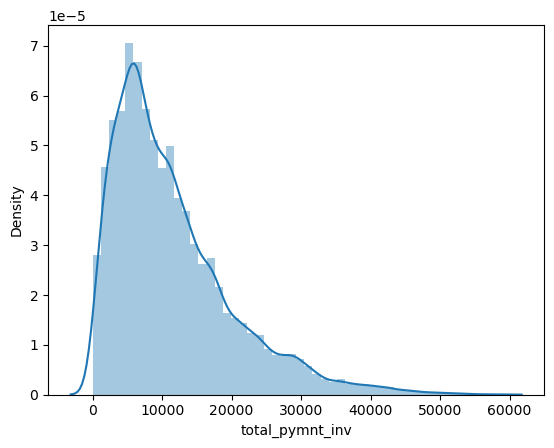

In [2212]:
sns.distplot(df1['total_pymnt_inv'])

## total_rec_prncp
total_rec_prncp: Principal received to date

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_rec_prncp', ylabel='Density'>

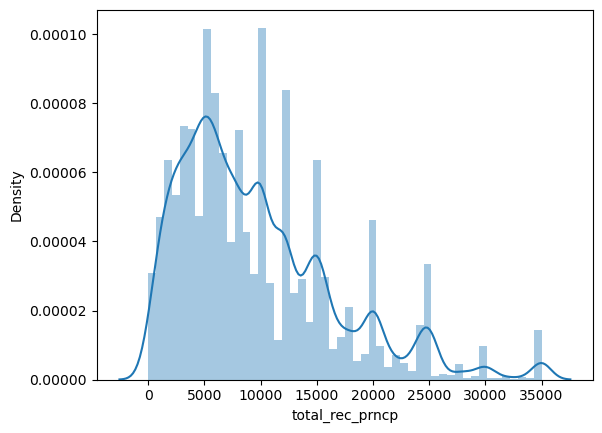

In [2213]:
sns.distplot(df1['total_rec_prncp'])

In [2214]:
np.corrcoef(df1['total_pymnt'],df1['total_pymnt_inv'])

array([[1.        , 0.97955059],
       [0.97955059, 1.        ]])

In [2215]:
np.corrcoef(df1['total_pymnt'],df1['total_rec_prncp'])

array([[1.        , 0.97340555],
       [0.97340555, 1.        ]])

As, total_pymnt, total_pymnt_inv, total_rec_prncp are directly corelated to each other. Therefore, total_pymnt will be kept and other two will be dropped as those two won't add up any value wwhile prediction.

In [2216]:
df1.drop(['total_pymnt_inv','total_rec_prncp'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\1365389841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['total_pymnt_inv','total_rec_prncp'], axis=1, inplace=True)


### total_rec_late_fee  
total_rec_late_fee: Late fees recieved to date.

In [2217]:
df1['total_rec_late_fee'].value_counts()

0.000000     35910
15.000000      236
15.000000       56
30.000000       51
15.000000       46
             ...  
29.948287        1
67.606386        1
24.330000        1
37.088716        1
52.262227        1
Name: total_rec_late_fee, Length: 1264, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_rec_late_fee', ylabel='Density'>

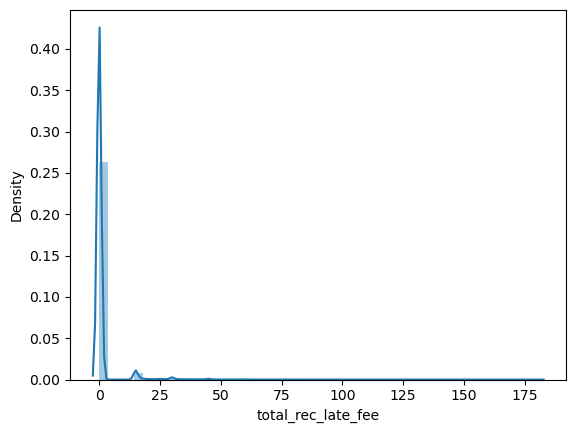

In [2218]:
sns.distplot(df1['total_rec_late_fee'])

The total payment recieved late has already been included in total payment recieved to date, therefore it will be dropped.

In [2219]:
df1.drop(['total_rec_late_fee'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\1290939451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['total_rec_late_fee'], axis=1, inplace=True)


### recoveries  
recoveries: post charge off gross recovery

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='recoveries', ylabel='Density'>

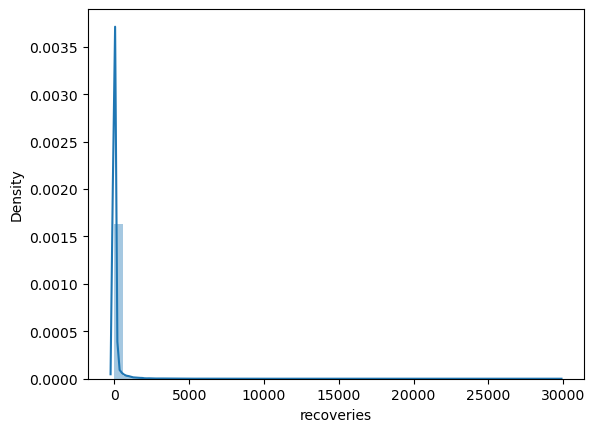

In [2220]:
sns.distplot(df1['recoveries'])

Recoveries are already included in the total amount paid to date. Therefore, it will also be dropped.

In [2221]:
df1.drop(['recoveries'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\3755875037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['recoveries'], axis=1, inplace=True)


### collection_recovery_fee  
collection_recovery_fee: post charge off collection fee

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='collection_recovery_fee', ylabel='Density'>

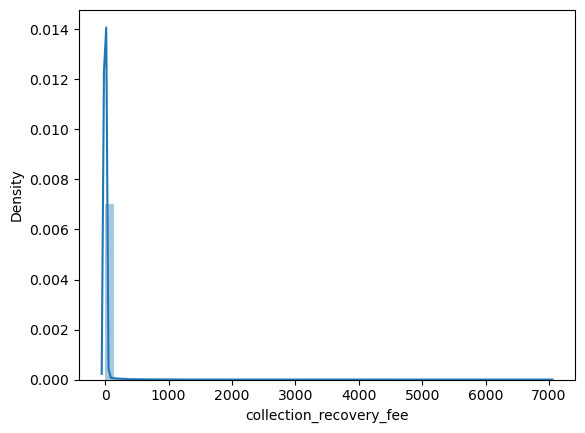

In [2222]:
sns.distplot(df1['collection_recovery_fee'])

Collection recovery fee is also included in the total amount paid, therefore, this feature will also be deleated.

In [2223]:
df1.drop(['collection_recovery_fee'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\3093261562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['collection_recovery_fee'], axis=1, inplace=True)


### last_pymnt_d  
last_pymnt_d: Last month payment was received

In [2224]:
df1['last_pymnt_d'].unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15', 'Feb-14',
       'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13', 'May-14', 'Mar-15',
       'Jan-13', 'Dec-13', 'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15',
       'Mar-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Apr-16', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

The month when the last payment wa srecieved won't add up any value in predicting the loan status, therefore it will be dropped.

In [2225]:
df1.drop(['last_pymnt_d'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\3456645697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['last_pymnt_d'], axis=1, inplace=True)


### last_pymnt_amnt  
last_pymnt_amnt: Last total payment amount received

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_pymnt_amnt', ylabel='Density'>

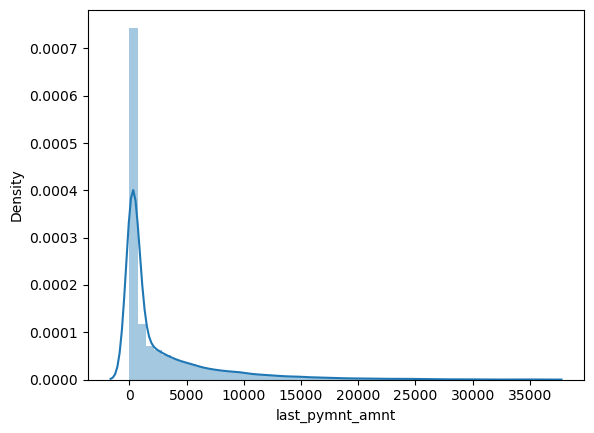

In [2226]:
sns.distplot(df1['last_pymnt_amnt'])

As this variable is also included in the total amount paid. So, it will also be dropped.

In [2227]:
df1.drop(['last_pymnt_amnt'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\1614862844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['last_pymnt_amnt'], axis=1, inplace=True)


### last_credit_pull_d  
last_credit_pull_d: The most recent month LC pulled credit for this loan

In [2228]:
df1['last_credit_pull_d'].unique()

array(['May-16', 'Sep-13', 'Apr-16', 'Jan-16', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Feb-16', 'Mar-16', 'Sep-12', 'May-13',
       'Jan-15', 'Jun-12', 'Mar-15', 'Dec-12', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Jul-14', 'Sep-15', 'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12',
       'Oct-15', 'Apr-12', 'Aug-15', 'Jun-14', 'Jan-12', 'Aug-14',
       'Jun-13', 'Dec-13', 'May-12', 'Jul-12', 'Jan-14', 'Jul-13',
       'Apr-13', 'May-15', 'Feb-15', 'Mar-12', 'Nov-11', 'Dec-11',
       'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Feb-10', 'Mar-10', 'Aug-07', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Jul-09', 'Aug-09',
       'May-09', 'Jun-09', 'Apr-09', 'Mar-09', 'Feb-09', 

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_credit_pull_d', ylabel='count'>

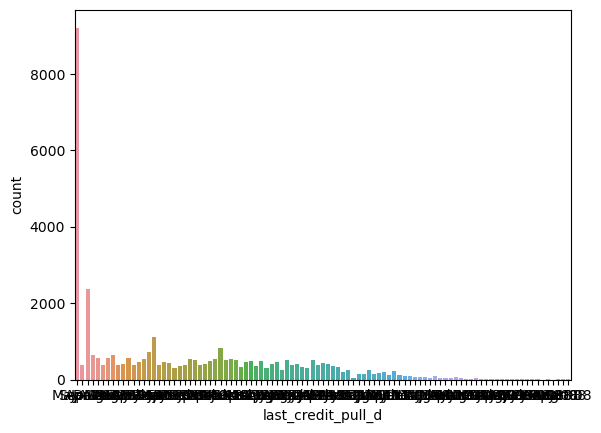

In [2229]:
sns.countplot(df1['last_credit_pull_d'])

In [2230]:
df1.drop(['last_credit_pull_d'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\3234307804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['last_credit_pull_d'], axis=1, inplace=True)


The following few features will be dropped as these features contain only a single value, therefore considering those as constant features.

### collections_12_mths_ex_med  
collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='collections_12_mths_ex_med', ylabel='Density'>

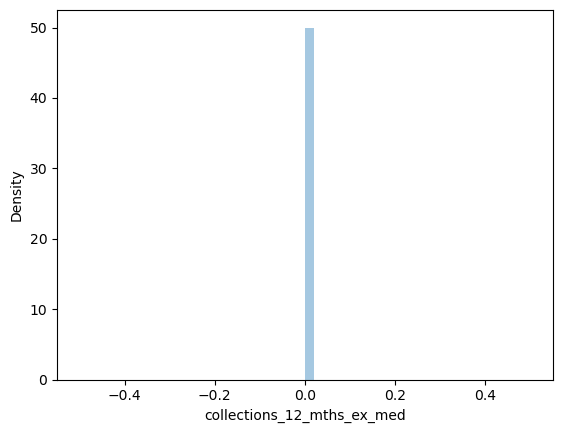

In [2231]:
sns.distplot(df1['collections_12_mths_ex_med'])

As it is aconstant feature, so will also be dropped.

In [2232]:
df1.drop(['collections_12_mths_ex_med'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\2617826177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['collections_12_mths_ex_med'], axis=1, inplace=True)


### policy_code  
policy_code : 1 prepresents publicly available policy and 2 indicates new products not publicly available.

In [2233]:
df1['policy_code'].value_counts()

1    37830
Name: policy_code, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='policy_code', ylabel='count'>

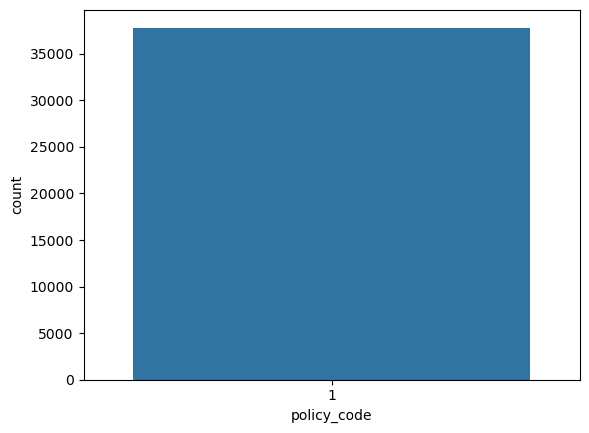

In [2234]:
sns.countplot(df1['policy_code'])

In [2235]:
df1.drop(['policy_code'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\367314428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['policy_code'], axis=1, inplace=True)


### application_type  
application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers

In [2236]:
df1['application_type'].value_counts()

INDIVIDUAL    37830
Name: application_type, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='application_type', ylabel='count'>

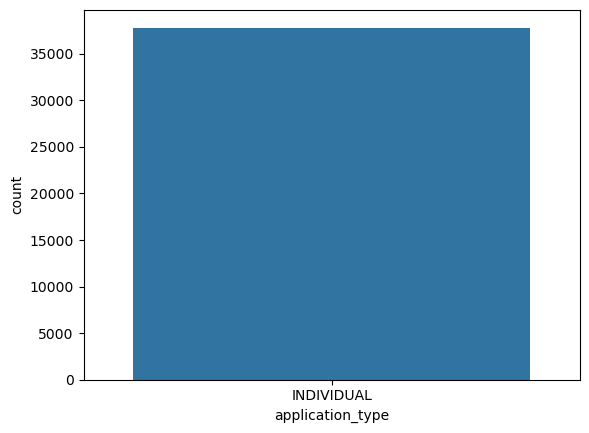

In [2237]:
sns.countplot(df1['application_type'])

In [2238]:
df1.drop(['application_type'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\536727507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['application_type'], axis=1, inplace=True)


### acc_now_delinq  
acc_now_delinq: The number of accounts on which the borrower is now delinquent.

In [2239]:
df1['acc_now_delinq'].value_counts()

0    37830
Name: acc_now_delinq, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='acc_now_delinq', ylabel='count'>

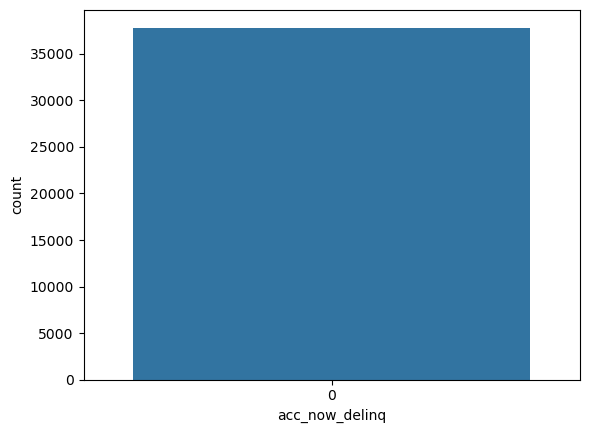

In [2240]:
sns.countplot(df1['acc_now_delinq'])

In [2241]:
df1.drop(['acc_now_delinq'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\3371196135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['acc_now_delinq'], axis=1, inplace=True)


### chargeoff_within_12_mths  
chargeoff_within_12_mths: Number of charge-offs within 12 months

In [2242]:
df1['chargeoff_within_12_mths'].value_counts()

0.0    37828
Name: chargeoff_within_12_mths, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chargeoff_within_12_mths', ylabel='count'>

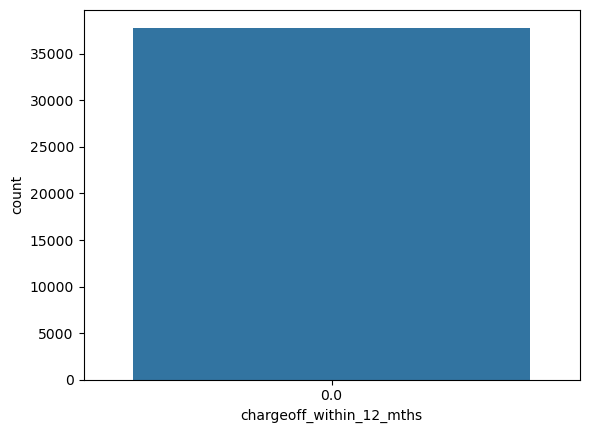

In [2243]:
sns.countplot(df1['chargeoff_within_12_mths'])

In [2244]:
df1.drop(['chargeoff_within_12_mths'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\4104928994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['chargeoff_within_12_mths'], axis=1, inplace=True)


### delinq_amnt  
delinq_amnt: The past-due amount owed for the accounts on which the borrower is now delinquent.

In [2245]:
df1['delinq_amnt'].value_counts()

0    37830
Name: delinq_amnt, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delinq_amnt', ylabel='count'>

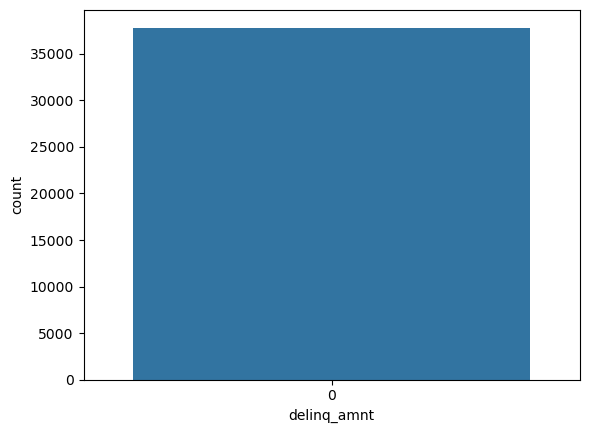

In [2246]:
sns.countplot(df1['delinq_amnt'])

In [2247]:
df1.drop(['delinq_amnt'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\3801843122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['delinq_amnt'], axis=1, inplace=True)


### tax_liens  
tax_liens: Number of tax liens

In [2248]:
df1['tax_liens'].value_counts()

0.0    37830
Name: tax_liens, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tax_liens', ylabel='count'>

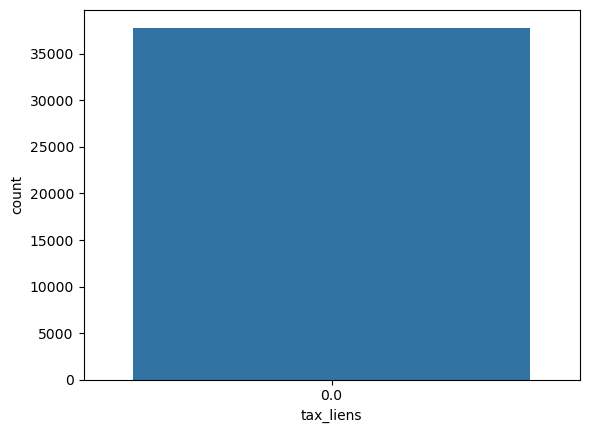

In [2249]:
sns.countplot(df1['tax_liens'])

In [2250]:
df1.drop(['tax_liens'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\1267652790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['tax_liens'], axis=1, inplace=True)


In [2251]:
df1.shape

(37830, 28)

## Categorical Variables:

In [2252]:
df1.columns[df1.dtypes==object]

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'url', 'purpose',
       'title', 'addr_state'],
      dtype='object')

### id, member_id, url

In [2253]:
df1.drop(['url'], axis=1,inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\3771968205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['url'], axis=1,inplace=True)


### grade, sub_grade  
grade: LC assigned loan grade  
sub_grade: LC assigned loan subgrade

In [2254]:
df1['grade'].value_counts()


B    11465
A     9903
C     7637
D     4958
E     2617
F      955
G      295
Name: grade, dtype: int64

In [2255]:
df1['sub_grade'].value_counts()

A4    2843
B3    2789
A5    2683
B5    2573
B4    2394
C1    2002
B2    1955
C2    1893
A3    1771
B1    1754
A2    1478
C3    1451
D2    1258
C4    1170
A1    1128
C5    1121
D3    1091
D1     898
D4     893
D5     818
E1     713
E2     602
E3     510
E4     415
E5     377
F1     301
F2     226
F3     171
F4     145
F5     112
G1      92
G2      76
G4      54
G3      45
G5      28
Name: sub_grade, dtype: int64

grade and subgrade is alloted based on the interest rate, as interest rate is already a feature, therefore, these two will be dropped as these won't add up any extra value to the analysis.

In [2256]:
df1.drop(['grade','sub_grade'], inplace=True, axis=1)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\3042788191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['grade','sub_grade'], inplace=True, axis=1)


### Term  
term: The number of payments on the loan. Values are in months and can be either 36 or 60.

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='term', ylabel='count'>

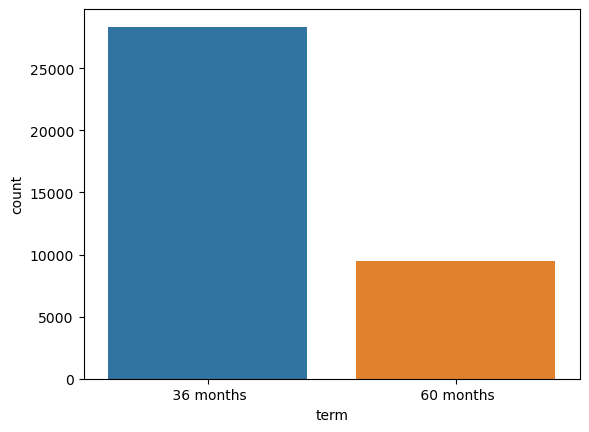

In [2257]:
sns.countplot(df1['term'])

### inq_last_6mths  
inq_last_6mths: The number of credit inquiries in past 6 months (excluding auto and mortgage inquiries)

In [2258]:
df1['inq_last_6mths'].value_counts()

0    18377
1    10447
2     5544
3     2910
4      308
5      138
6       60
7       34
8       12
Name: inq_last_6mths, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

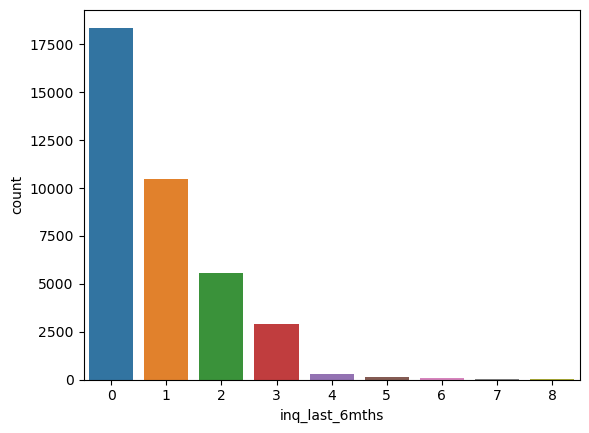

In [2259]:
sns.countplot(df1['inq_last_6mths'])

### emp_title  
emp_title: The job title supplied by the Borrower when applying for the loan.

In [2260]:
df1['emp_title'].value_counts()

US Army                        129
Bank of America                106
IBM                             65
AT&T                            57
Kaiser Permanente               55
                              ... 
Schneider Finance                1
Shah Smith  and  Associates      1
friendship center golf cars      1
Crane 1 Services                 1
Fairfield Manufacturing          1
Name: emp_title, Length: 27512, dtype: int64

In [2261]:
#finding null values in the emp_title column
df1['emp_title'].isnull().sum()

2339

In [2262]:
len(df1['emp_title'])

37830

In [2263]:
df1['emp_title'].nunique()

27512

As nearly 72% of the values are unique in the emp_title column, therefore it's hard to impute the missing employee titles as well as encode this feature as contains too many unique values. Therefore, this column will be dropped.


In [2264]:
df1.drop(['emp_title'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\2633227538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['emp_title'], axis=1, inplace=True)


### emp_length  
 emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [2265]:
df1['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [2266]:
df1['emp_length'].value_counts().sort_values(ascending=False)

10+ years    8368
< 1 year     4329
2 years      4202
3 years      3947
4 years      3290
5 years      3157
1 year       3071
6 years      2133
7 years      1686
8 years      1408
9 years      1209
Name: emp_length, dtype: int64

In [2267]:
df1['emp_length'].isnull().mean()

0.027227068464181867

In [2268]:
df1.dropna(subset=['emp_length'], inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\801004288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['emp_length'], inplace=True)


In [2269]:
df1['emp_length'].isnull().sum()

0

In [2270]:
df1['emp_length'].value_counts()

10+ years    8368
< 1 year     4329
2 years      4202
3 years      3947
4 years      3290
5 years      3157
1 year       3071
6 years      2133
7 years      1686
8 years      1408
9 years      1209
Name: emp_length, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


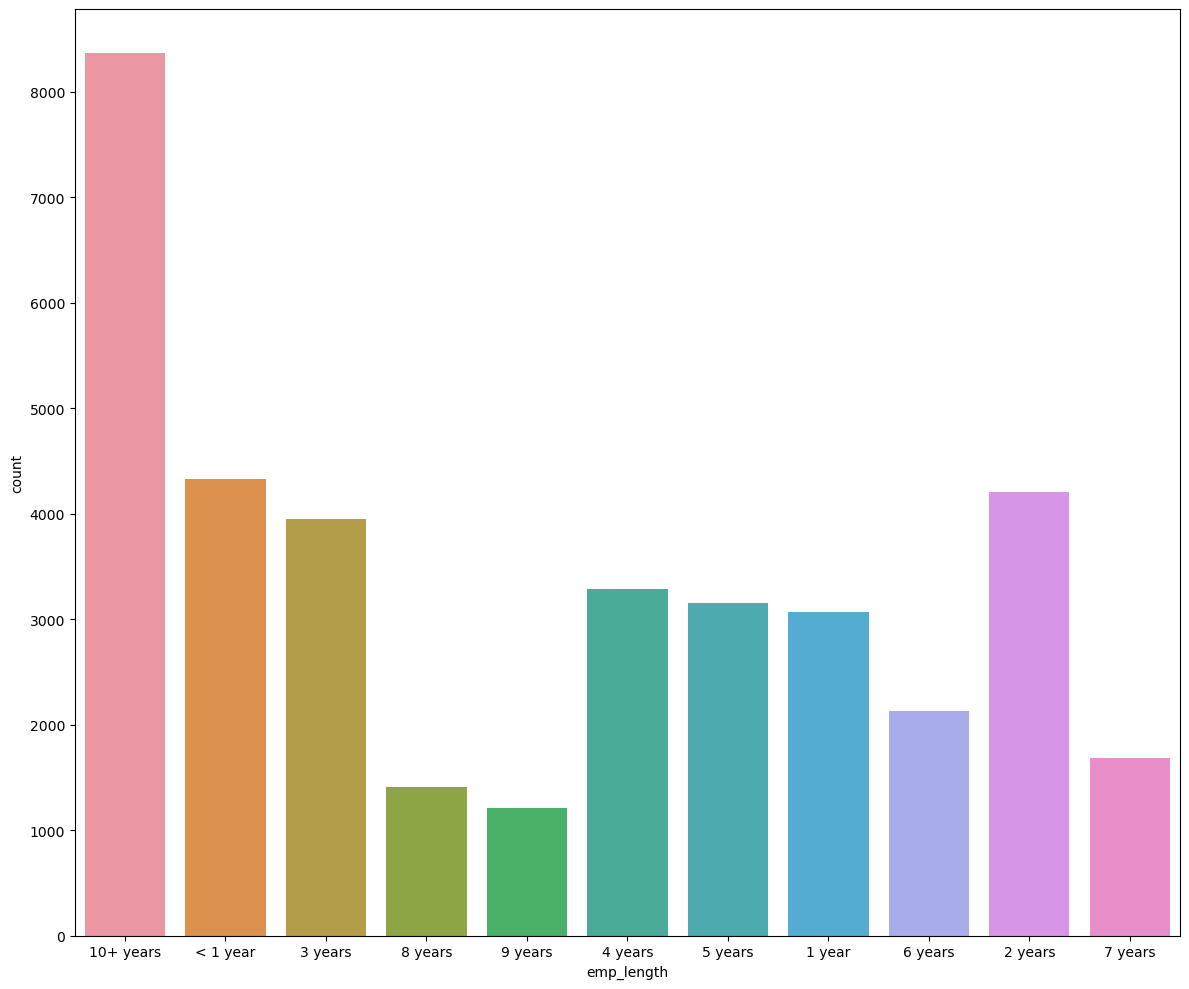

In [2271]:
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.countplot(df1['emp_length'])
plt.tight_layout()
plt.show()

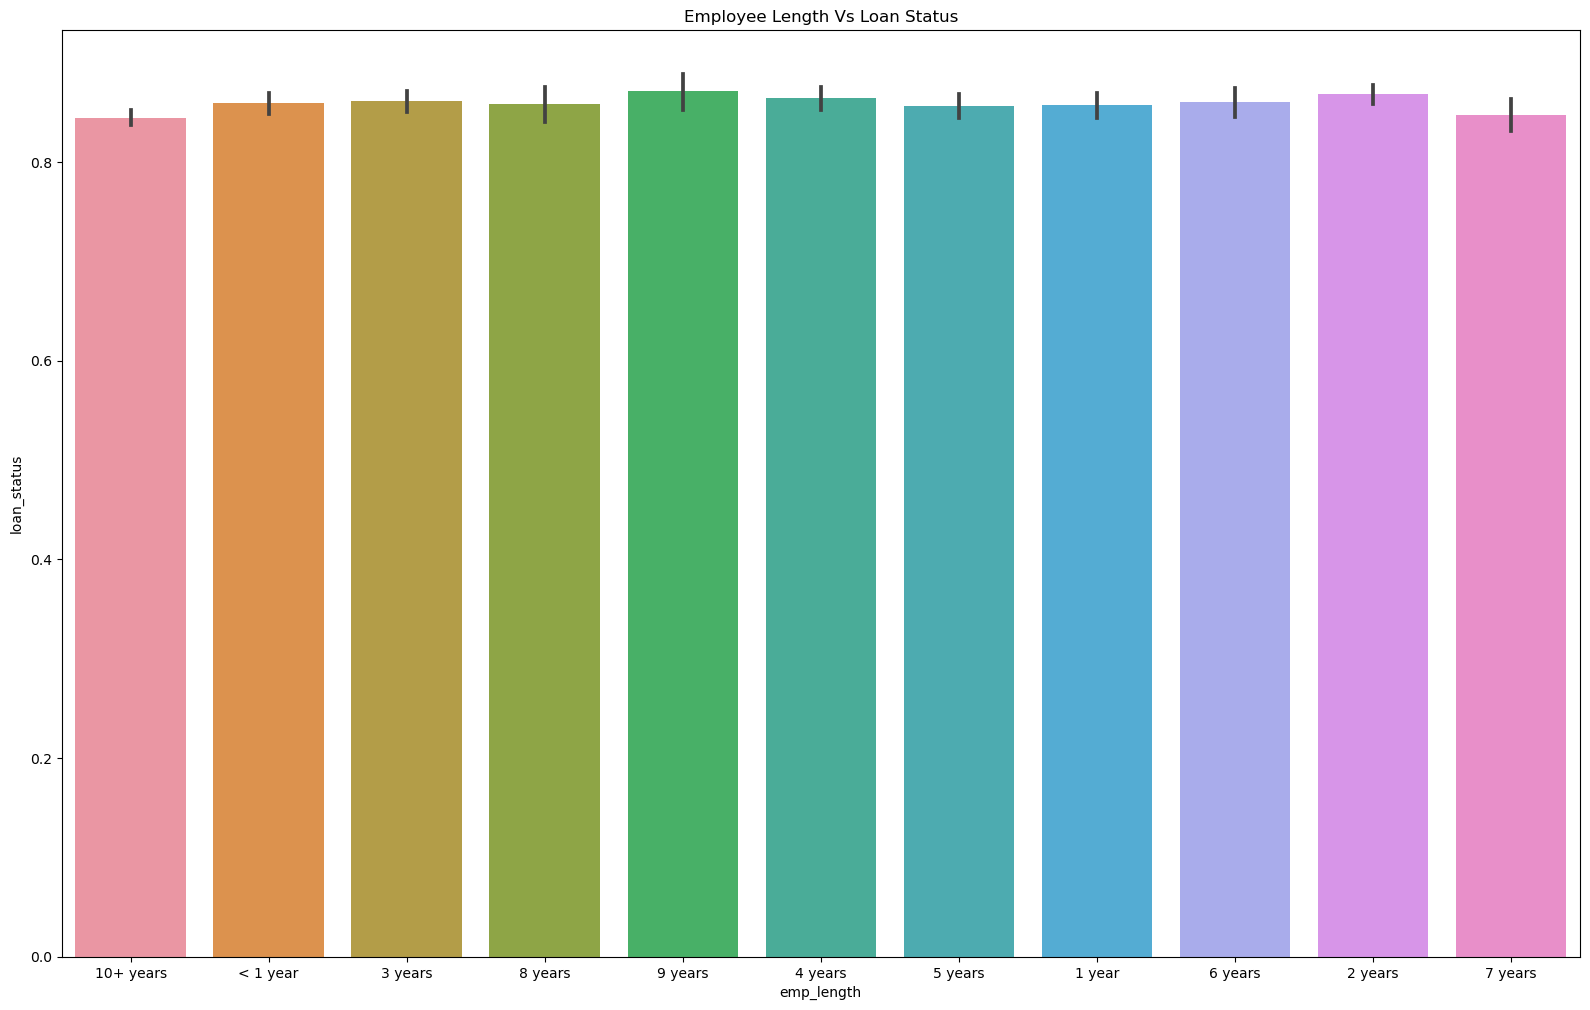

In [2272]:
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.barplot(x=df1["emp_length"], y=df1['loan_status'])
plt.tight_layout()
plt.title('Employee Length Vs Loan Status')
plt.show()

In [2273]:
#cleaning emp_length column
df1['emp_length'] = df1['emp_length'].replace({'< 1 year':'0 year'},regex=True)
df1['emp_length'] = df1['emp_length'].replace({'years':'','year':'','\+':''},regex=True)
df1["emp_length"] = df1["emp_length"].apply(lambda x:int(x))
df1["emp_length"].unique()

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\1556207066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['emp_length'] = df1['emp_length'].replace({'< 1 year':'0 year'},regex=True)
C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\1556207066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['emp_length'] = df1['emp_length'].replace({'years':'','year':'','\+':''},regex=True)
C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\1556207066.py:4: SettingWithCopyWarning: 
A value is trying t

array([10,  0,  3,  8,  9,  4,  5,  1,  6,  2,  7], dtype=int64)

### home_ownership  
home_ownership: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [2274]:
df1['home_ownership'].value_counts()

RENT        17667
MORTGAGE    16334
OWN          2703
OTHER          96
Name: home_ownership, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

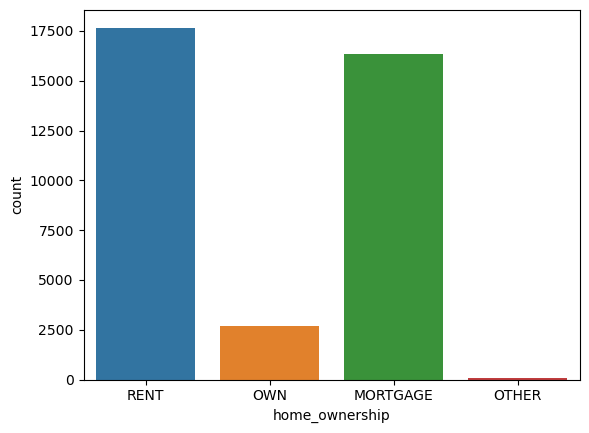

In [2275]:
sns.countplot(df1['home_ownership'])

<AxesSubplot:xlabel='home_ownership', ylabel='loan_status'>

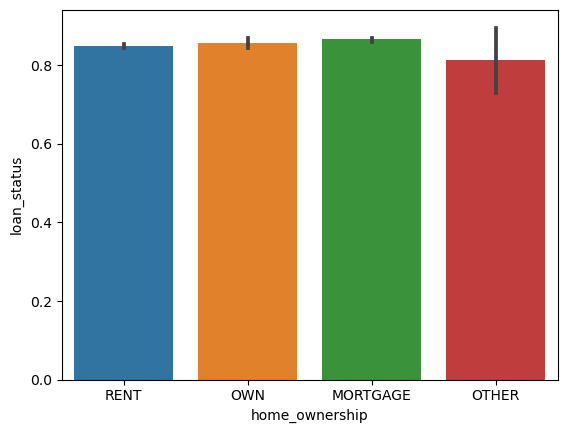

In [2276]:
sns.barplot(x=df1['home_ownership'], y=df1['loan_status'])

As the 'own' and 'other'category are less frequent, therefore to avoid the overfitting and underfitting, both these categories will be converted into single category for encoding. 

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\1654201630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['home_ownership'] = np.where(df1['home_ownership'].isin(rare_labels),'Own/Other/None',df1['home_ownership'])
C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

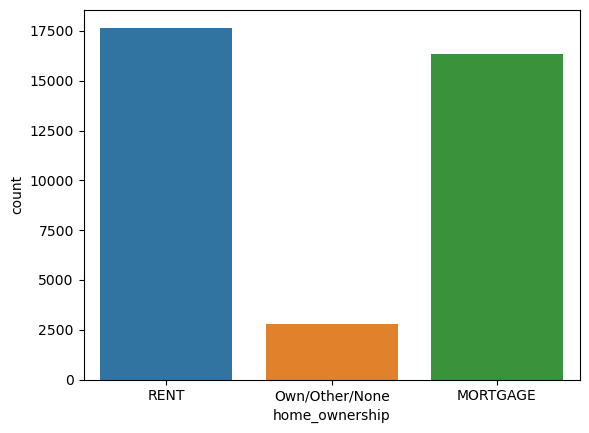

In [2277]:
hmeown_freq = 100*(df1['home_ownership'].value_counts()/len(df1['home_ownership']))
rare_labels = [x for x in hmeown_freq.loc[hmeown_freq<30].index.values]
df1['home_ownership'] = np.where(df1['home_ownership'].isin(rare_labels),'Own/Other/None',df1['home_ownership'])
sns.countplot(df1['home_ownership'])

### verification_status  
verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified

In [2278]:
df1['verification_status'].value_counts()

Not Verified       15554
Verified           11763
Source Verified     9483
Name: verification_status, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='verification_status', ylabel='count'>

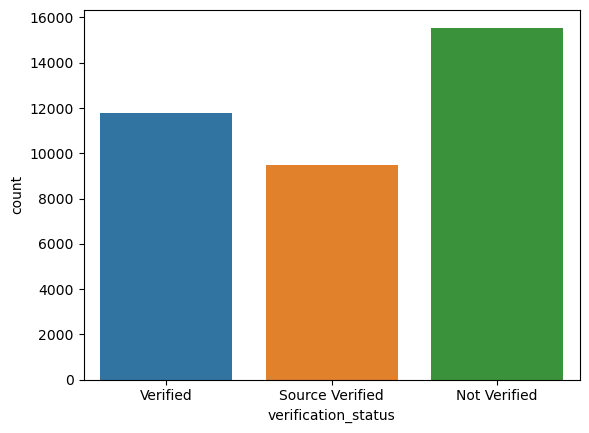

In [2279]:
sns.countplot(df1['verification_status'])

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='verification_status', ylabel='loan_status'>

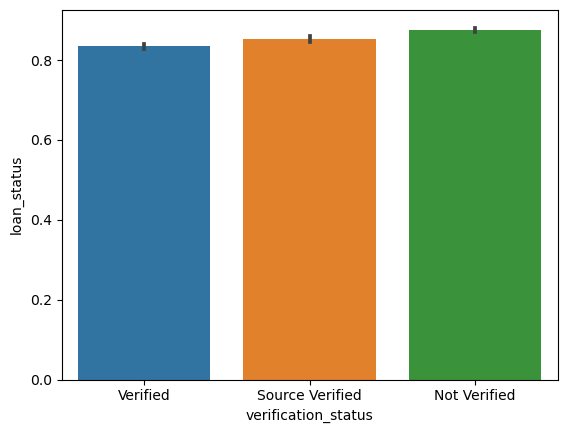

In [2280]:
sns.barplot(df1['verification_status'], df1['loan_status'])

### issue_d  
issue_d: The month which the loan was funded

In [2281]:
df1['issue_d'].value_counts()

Dec-11    1994
Nov-11    1970
Oct-11    1862
Sep-11    1837
Aug-11    1751
Jun-11    1674
Jul-11    1672
May-11    1554
Apr-11    1505
Mar-11    1400
Jan-11    1336
Feb-11    1239
Dec-10    1219
Nov-10    1096
Jul-10    1091
Oct-10    1083
Sep-10    1057
Aug-10    1055
Jun-10     991
May-10     894
Apr-10     806
Mar-10     717
Feb-10     604
Nov-09     601
Dec-09     596
Jan-10     583
Oct-09     544
Sep-09     447
Aug-09     407
Jul-09     373
Jun-09     354
May-09     319
Apr-09     288
Mar-09     275
Feb-09     259
Jan-09     236
Dec-08     222
Nov-08     183
Apr-08     155
Mar-08     117
Oct-08      96
Jul-08      82
Aug-08      69
May-08      69
Jun-08      66
Sep-08      32
Feb-08       7
Jan-08       6
Dec-07       2
Nov-07       2
Aug-07       2
Oct-07       1
Name: issue_d, dtype: int64

In [2282]:
df1.drop(['issue_d'], axis=1, inplace=True)


C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\2900849577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['issue_d'], axis=1, inplace=True)


### purpose  
purpose: A category provided by the borrower for the loan request. 

In [2283]:
df1['purpose'].value_counts()

debt_consolidation    17373
credit_card            4799
other                  3595
home_improvement       2734
major_purchase         2055
small_business         1656
car                    1429
wedding                 893
medical                 645
moving                  541
house                   349
vacation                341
educational             296
renewable_energy         94
Name: purpose, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


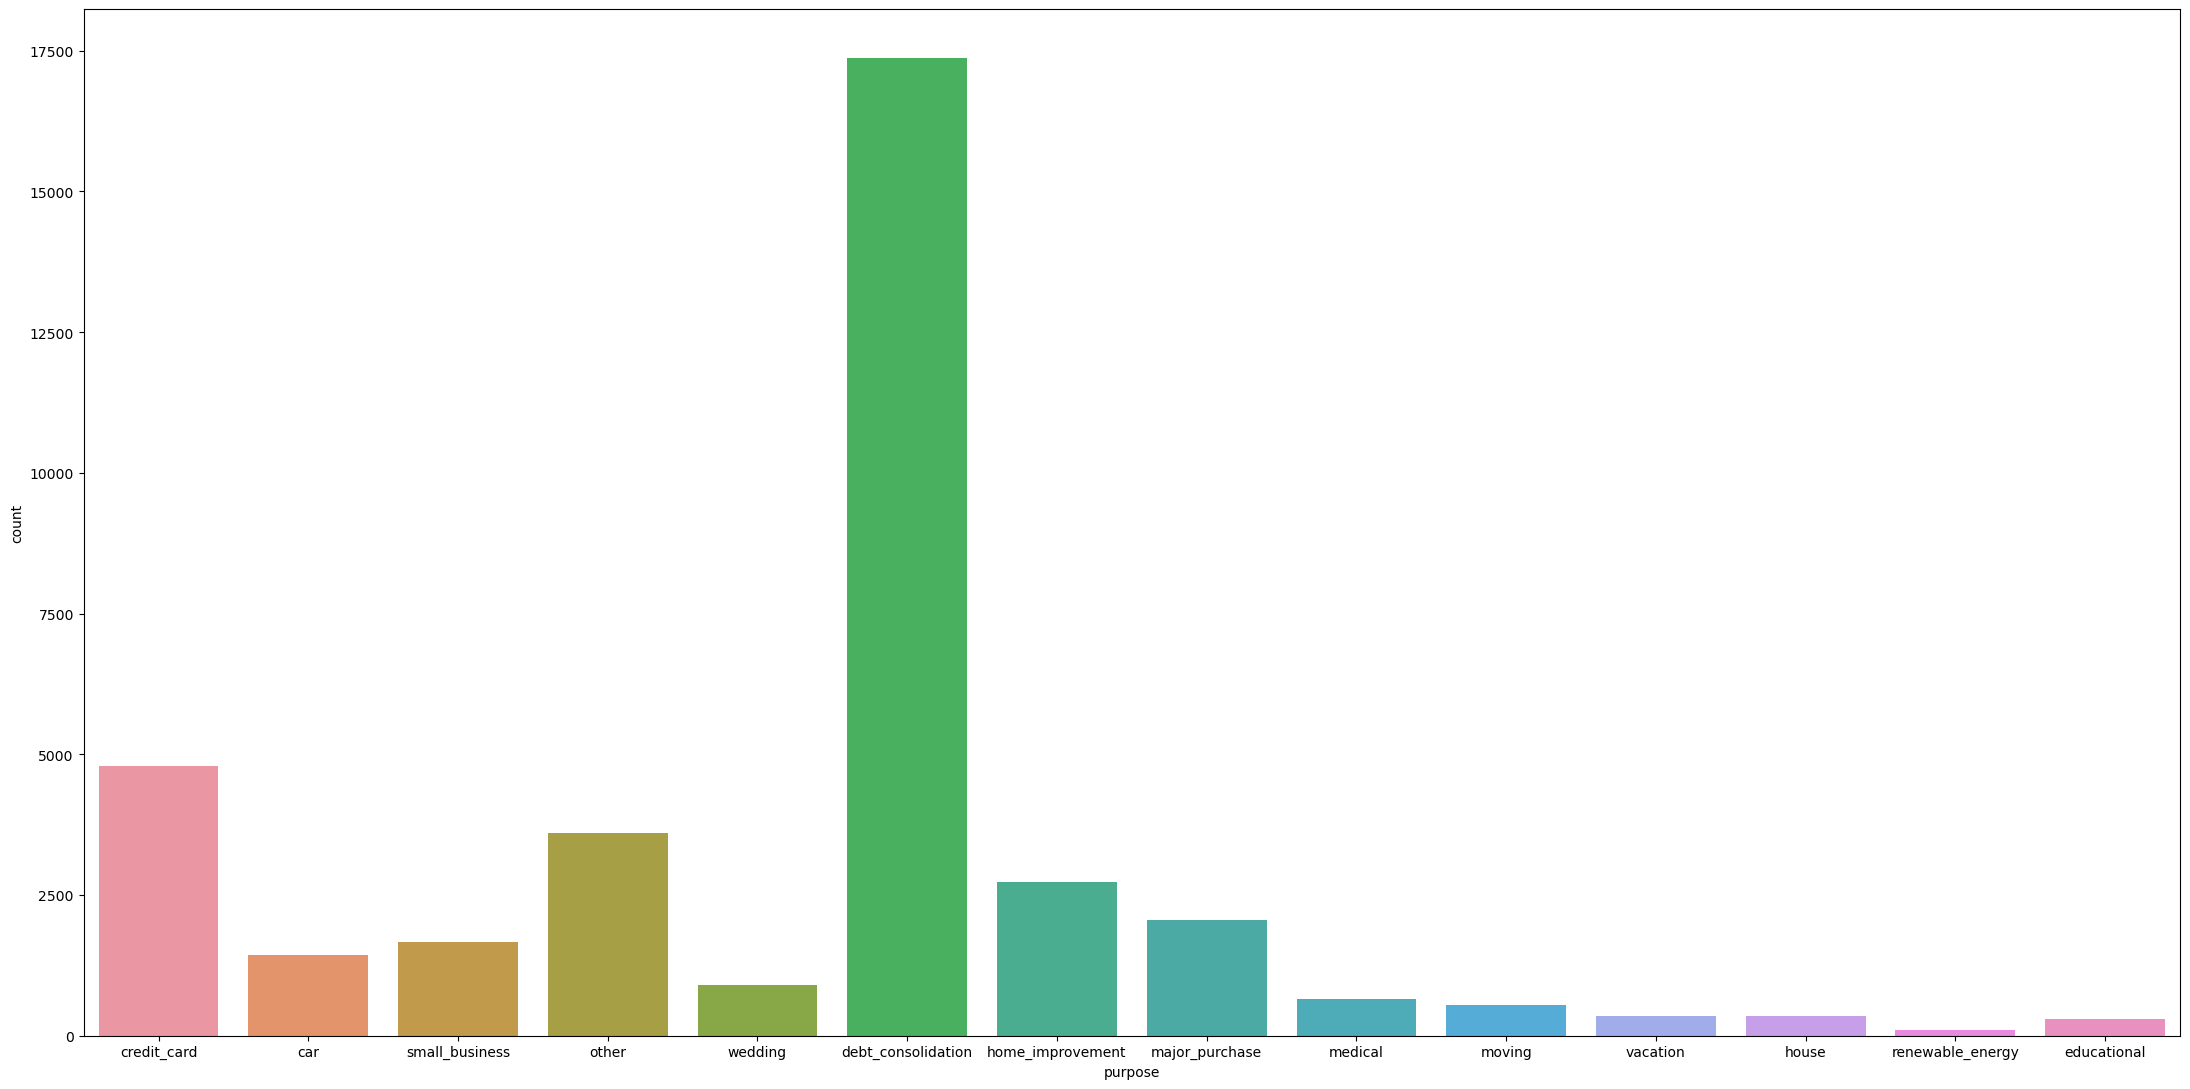

In [2284]:
fig, ax = plt.subplots(figsize=(22,11))
ax = sns.countplot(df1['purpose'])
plt.tight_layout()
plt.show()

In [2285]:
df1['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

As few categories are very frequent and others are quite less in number, lets explore each categories' contribution to total count. 

In [2286]:
df_feat_purpose = pd.DataFrame({'Count':df1['purpose'].value_counts(),
                               '% of Total':df1['purpose'].value_counts()/len(df1['purpose'])
                               })
df_feat_purpose.reset_index(inplace=True)
df_feat_purpose.columns = ['Purpose','Count','% of Total'] 
df_feat_purpose['% cumsum'] = df_feat_purpose['% of Total'].cumsum()
df_feat_purpose

,Purpose,Count,% of Total,% cumsum
0,debt_consolidation,17373,0.472092,0.472092
1,credit_card,4799,0.130408,0.602500
2,other,3595,0.097690,0.700190
3,home_improvement,2734,0.074293,0.774484
4,major_purchase,2055,0.055842,0.830326
5,small_business,1656,0.045000,0.875326
6,car,1429,0.038832,0.914158
7,wedding,893,0.024266,0.938424
8,medical,645,0.017527,0.955951
9,moving,541,0.014701,0.970652


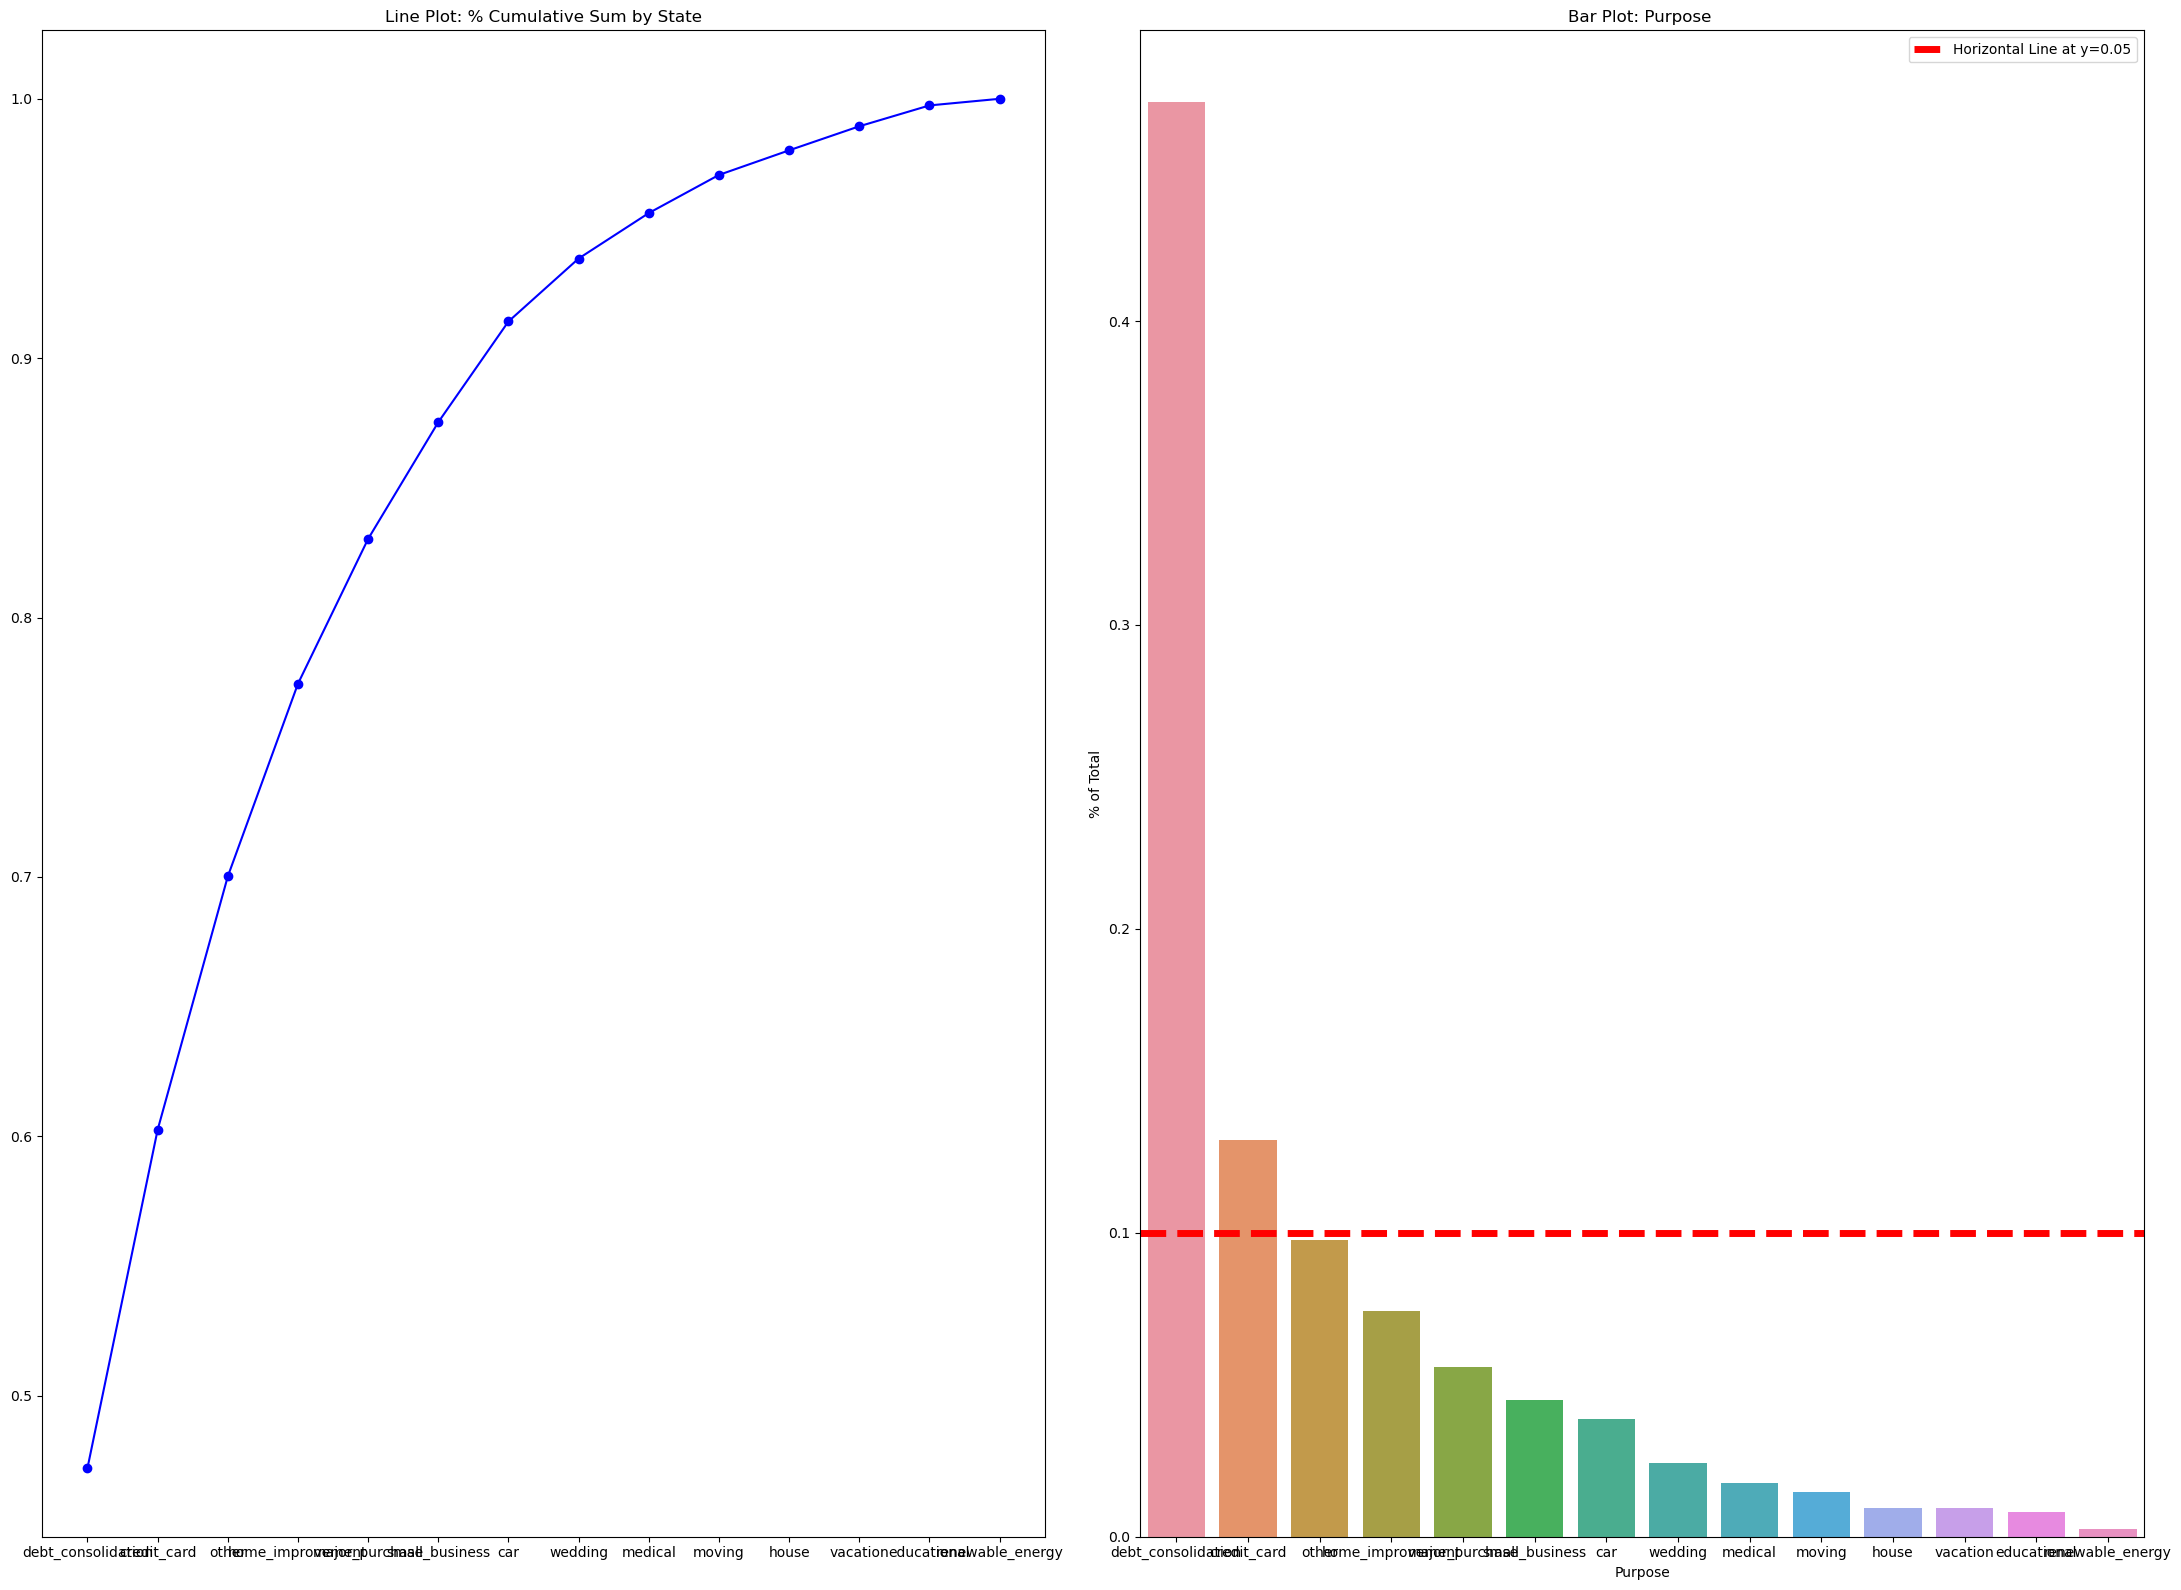

In [2287]:
fig, ax = plt.subplots(1, 2, figsize=(22, 16))

# Plot the line plot in the first subplot (ax[0])
ax[0].plot(df_feat_purpose['Purpose'], df_feat_purpose['% cumsum'], marker='o', linestyle='-', color='b')
ax[0].set_title('Line Plot: % Cumulative Sum by State')

# Plot the bar plot in the second subplot (ax[1])
sns.barplot(x=df_feat_purpose['Purpose'], y=df_feat_purpose['% of Total'], ax=ax[1])
ax[1].set_title('Bar Plot: Purpose ')

# Add a horizontal line at y=0.05 in the second subplot
ax[1].axhline(y=0.1, color='red', linestyle='--', label='Horizontal Line at y=0.05', lw=5)
ax[1].legend()

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

# Show the plots
plt.show()

As count of debt consolidation is nearly 47% of the total and the prominant category is credit card. The others contributes less than 10% of the total individually. Therefore, to avoid overfitting or undertraining, all the less frequent categories are categorized as others. 

In [2289]:
#make rare labels
values_freq = 100*(df1['purpose'].value_counts()/len(df1['purpose']))
rare_labels = [x for x in values_freq.loc[values_freq<10].index.values]
rare_labels

['other',
 'home_improvement',
 'major_purchase',
 'small_business',
 'car',
 'wedding',
 'medical',
 'moving',
 'house',
 'vacation',
 'educational',
 'renewable_energy']

In [2290]:
df1['purpose'] = np.where(df1['purpose'].isin(rare_labels),'other',df1['purpose'])
df1['purpose'].unique()

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\2375218199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['purpose'] = np.where(df1['purpose'].isin(rare_labels),'other',df1['purpose'])


array(['credit_card', 'other', 'debt_consolidation'], dtype=object)

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='purpose', ylabel='count'>

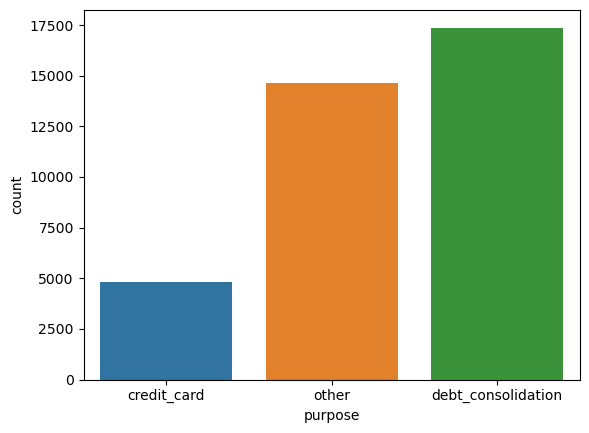

In [2291]:
sns.countplot(df1['purpose'])

### title  
title: The loan title provided by the borrower

In [2292]:
df1['title'].value_counts()

Debt Consolidation                        2030
Debt Consolidation Loan                   1582
Personal Loan                              600
Consolidation                              473
debt consolidation                         453
                                          ... 
AFLoan2011                                   1
 APRILIA TUONO 1000R                         1
Business Development Loan                    1
Found a great sailboat deal!                 1
Merging 2 Accounts into one to save $$       1
Name: title, Length: 18402, dtype: int64

In [2293]:
df1['title'].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Taking the First Step by Consolidating',
       'paying credit cards and doctor bill.',
       'Merging 2 Accounts into one to save $$'], dtype=object)

The unique values of the title and feature shows that both contain the same values. In other words, the purpose is the generalized title of the loan and vice-versa. Therefore, one on them wil get dropped and it will be title as it conatin so many variables and will create complexity while encoding.

In [2294]:
df1.drop(['title'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\4053656726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['title'], axis=1, inplace=True)


### addr_state  
addr_state: The state provided by the borrower in the loan application.

In [2295]:
df1['addr_state'].value_counts()

CA    6678
NY    3511
FL    2641
TX    2555
NJ    1730
IL    1429
PA    1424
VA    1306
GA    1294
MA    1229
OH    1126
MD     978
AZ     791
WA     760
CO     721
CT     697
NC     694
MI     662
MO     639
MN     574
NV     460
SC     443
OR     414
AL     410
WI     408
LA     408
KY     305
OK     281
KS     241
UT     241
AR     223
DC     206
RI     190
NM     173
WV     164
HI     160
NH     154
DE     107
MT      77
AK      75
WY      75
SD      59
VT      51
MS      19
TN      10
ID       4
IA       1
NE       1
IN       1
Name: addr_state, dtype: int64

C:\Users\MUH0351\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


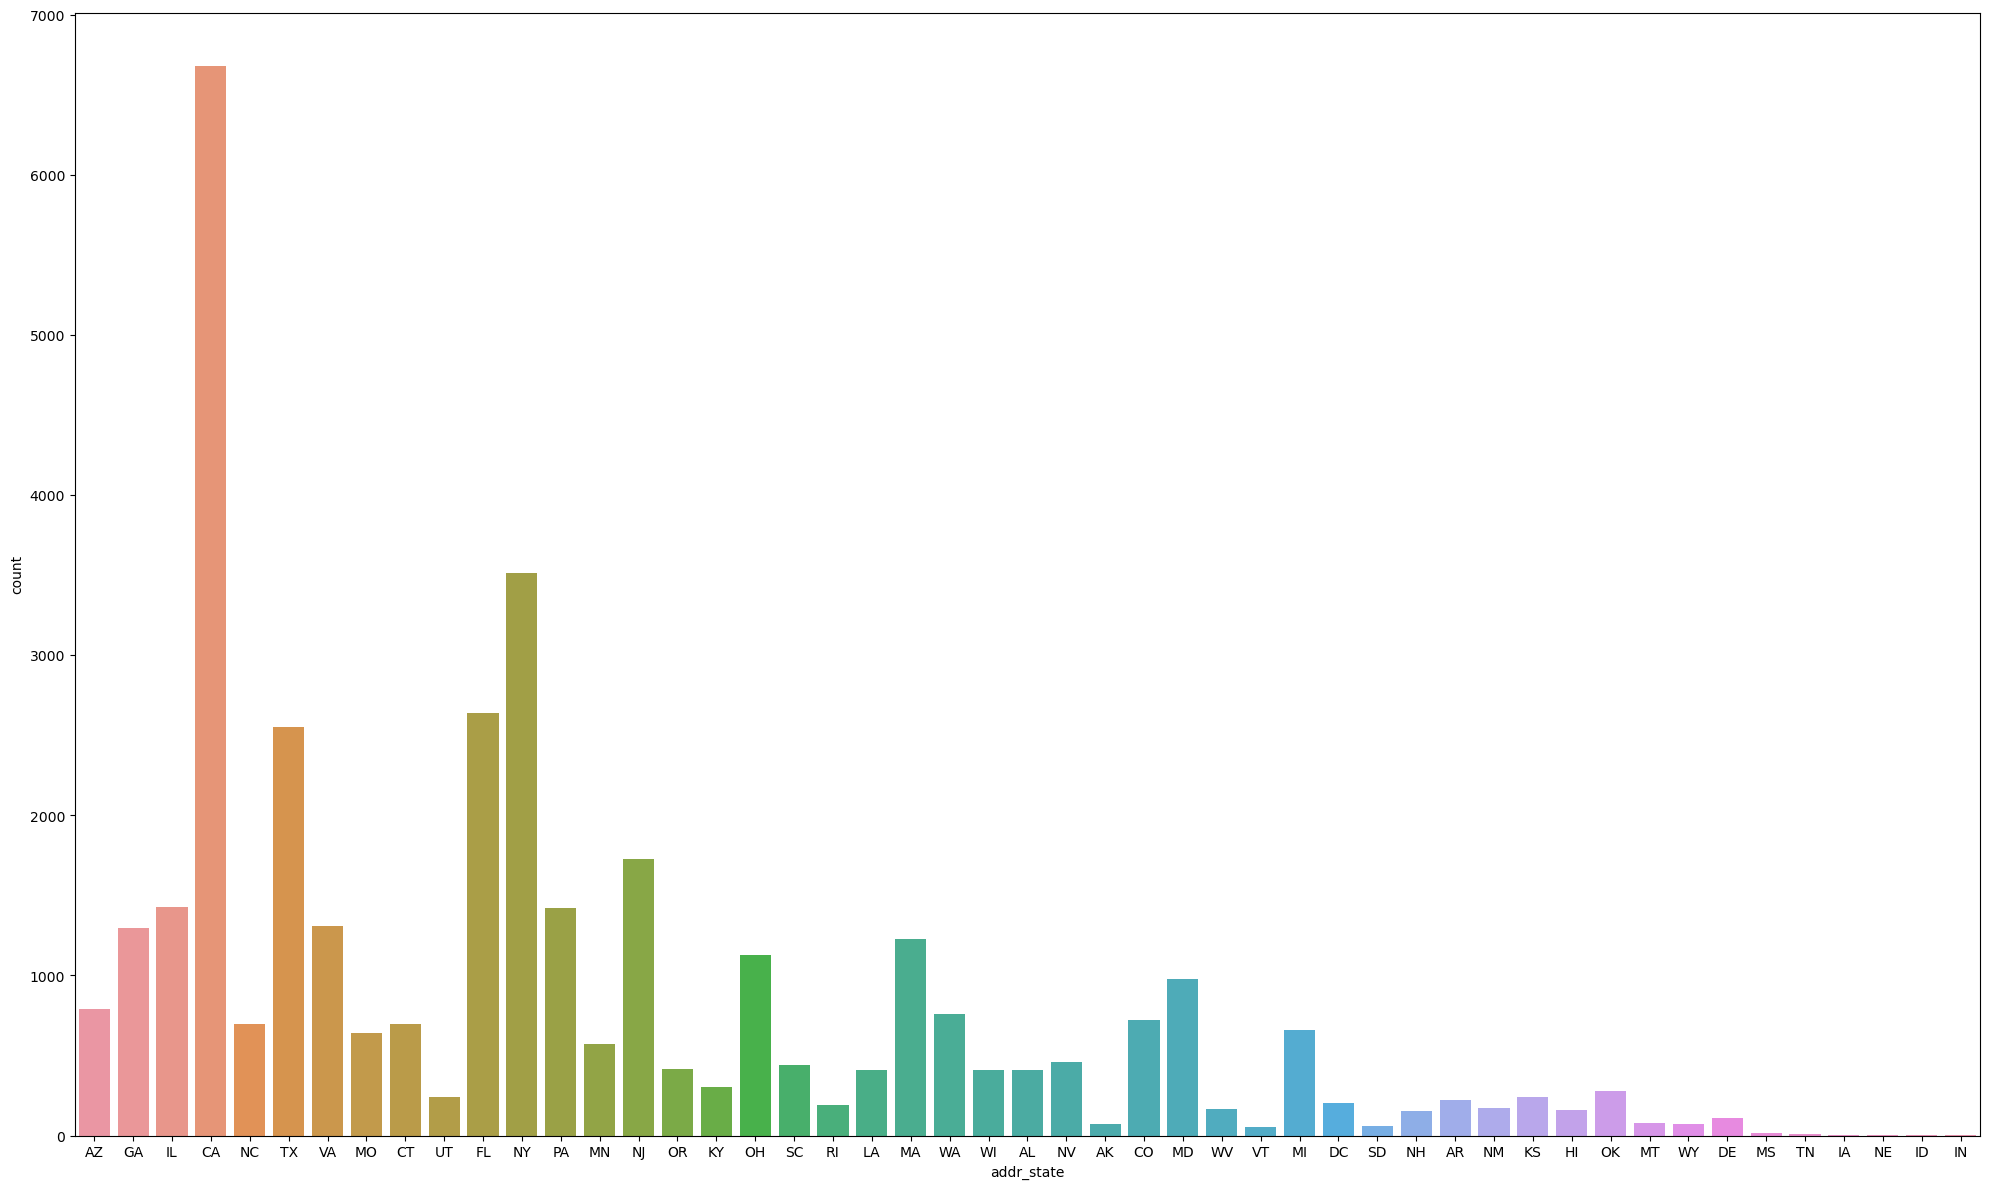

In [2296]:
fig, ax = plt.subplots(figsize=(20,12))
ax= sns.countplot(df1['addr_state'])
plt.tight_layout()
plt.show()

There are so many states which will make the model complex while encoding and moreover, states do not seem to have any significant impact in predicting the loan default. Therefore, it will be dropped.

In [2297]:
df1.drop(['addr_state'], axis=1, inplace=True)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_19748\431017073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['addr_state'], axis=1, inplace=True)


## Data Preprocessing:

In [2298]:
df1.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_int', 'pub_rec_bankruptcies'],
      dtype='object')

In [2299]:
df1.dtypes

loan_amnt                 int64
term                     object
int_rate                float32
installment             float64
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
loan_status                int8
purpose                  object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float32
total_acc                 int64
total_pymnt             float64
total_rec_int           float64
pub_rec_bankruptcies    float64
dtype: object

In [2300]:
df1.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
total_pymnt             0
total_rec_int           0
pub_rec_bankruptcies    0
dtype: int64

In [2301]:
df1.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_int', 'pub_rec_bankruptcies'],
      dtype='object')

## Categorical Encoding

In [2302]:
columns_to_encode = df1.columns[df1.dtypes==object]
columns_to_encode

Index(['term', 'home_ownership', 'verification_status', 'purpose'], dtype='object')

In [2303]:
df1 = pd.get_dummies(df1, columns=columns_to_encode)
df1.shape

(36800, 28)

In [2304]:
X=df1.drop(['loan_status'], axis=1)
y=df1['loan_status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, stratify=y)

In [2305]:
print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (24656, 27)
Shape of y_train:  (24656,)
Shape of x_test:  (12144, 27)
Shape of y_test:  (12144,)


In [2306]:
y.value_counts()

1    31534
0     5266
Name: loan_status, dtype: int64

### Combine Oversampling and Undersampling for imbalance data

In [2336]:
sm= SMOTE(
        sampling_strategy='auto',
        k_neighbors=5)

In [2337]:
enn = EditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel = 'all')

smenn = SMOTEENN(
        sampling_strategy='auto',
        smote=sm,
        enn=enn
)

X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

In [2338]:
y_train_smenn.value_counts()

0    21128
1    18443
Name: loan_status, dtype: int64

## Modelling:

## Logistic Regression

In [2339]:
lr_classifier = LogisticRegression()

In [2340]:
lr_classifier.fit(X_train_smenn,y_train_smenn)
predictions=lr_classifier.predict(X_test)

C:\Users\MUH0351\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2341]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1738
           1       0.99      0.98      0.98     10406

    accuracy                           0.97     12144
   macro avg       0.93      0.96      0.95     12144
weighted avg       0.97      0.97      0.97     12144



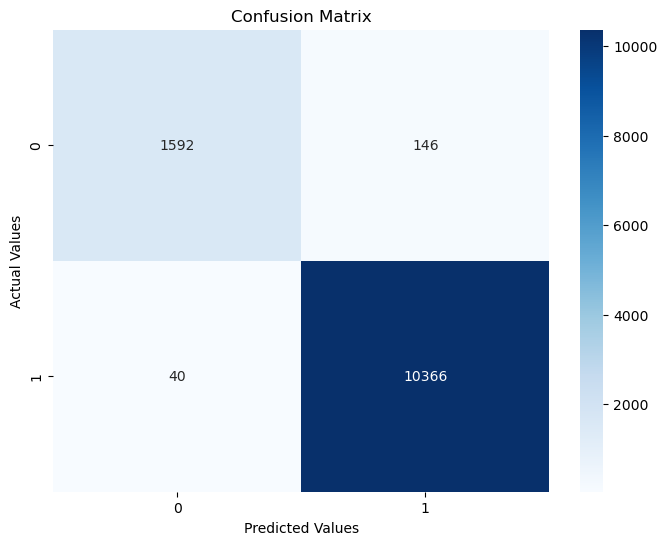

In [2351]:
cm=confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [2352]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train_smenn, y_train_smenn)

RandomForestClassifier()

In [2353]:
predictions=classifier_rf.predict(X_test)

In [2354]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1738
           1       0.96      1.00      0.98     10406

    accuracy                           0.96     12144
   macro avg       0.97      0.88      0.92     12144
weighted avg       0.96      0.96      0.96     12144



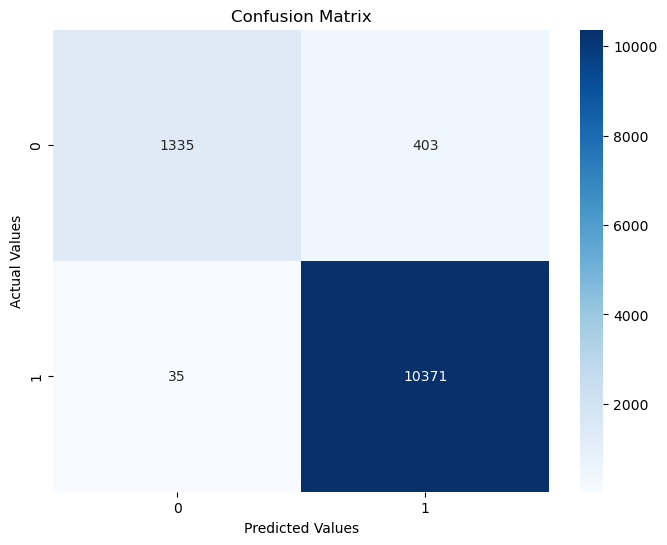

In [2355]:
cm=confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

### CATBOOST 

In [2356]:
classifier_cb = CatBoostClassifier()
classifier_cb.fit(X_train_smenn, y_train_smenn)

Learning rate set to 0.049547
0:	learn: 0.6286861	total: 20.7ms	remaining: 20.7s
1:	learn: 0.5803524	total: 41.6ms	remaining: 20.7s
2:	learn: 0.5397474	total: 63.5ms	remaining: 21.1s
3:	learn: 0.5082916	total: 82.7ms	remaining: 20.6s
4:	learn: 0.4808615	total: 101ms	remaining: 20.2s
5:	learn: 0.4454837	total: 121ms	remaining: 20.1s
6:	learn: 0.4136897	total: 140ms	remaining: 19.8s
7:	learn: 0.3952414	total: 160ms	remaining: 19.8s
8:	learn: 0.3776605	total: 179ms	remaining: 19.7s
9:	learn: 0.3525431	total: 198ms	remaining: 19.6s
10:	learn: 0.3316375	total: 220ms	remaining: 19.8s
11:	learn: 0.3157334	total: 239ms	remaining: 19.7s
12:	learn: 0.3034367	total: 261ms	remaining: 19.8s
13:	learn: 0.2924140	total: 281ms	remaining: 19.8s
14:	learn: 0.2845273	total: 300ms	remaining: 19.7s
15:	learn: 0.2755120	total: 319ms	remaining: 19.6s
16:	learn: 0.2638281	total: 338ms	remaining: 19.5s
17:	learn: 0.2567669	total: 357ms	remaining: 19.5s
18:	learn: 0.2509270	total: 376ms	remaining: 19.4s
19:	lea

171:	learn: 0.0678247	total: 3.44s	remaining: 16.6s
172:	learn: 0.0676795	total: 3.46s	remaining: 16.5s
173:	learn: 0.0670688	total: 3.48s	remaining: 16.5s
174:	learn: 0.0669453	total: 3.5s	remaining: 16.5s
175:	learn: 0.0666804	total: 3.52s	remaining: 16.5s
176:	learn: 0.0666002	total: 3.54s	remaining: 16.5s
177:	learn: 0.0664821	total: 3.56s	remaining: 16.4s
178:	learn: 0.0661788	total: 3.58s	remaining: 16.4s
179:	learn: 0.0661132	total: 3.6s	remaining: 16.4s
180:	learn: 0.0660444	total: 3.62s	remaining: 16.4s
181:	learn: 0.0659750	total: 3.64s	remaining: 16.3s
182:	learn: 0.0656720	total: 3.66s	remaining: 16.3s
183:	learn: 0.0653639	total: 3.68s	remaining: 16.3s
184:	learn: 0.0650718	total: 3.7s	remaining: 16.3s
185:	learn: 0.0648247	total: 3.72s	remaining: 16.3s
186:	learn: 0.0647653	total: 3.74s	remaining: 16.3s
187:	learn: 0.0642640	total: 3.76s	remaining: 16.2s
188:	learn: 0.0640942	total: 3.78s	remaining: 16.2s
189:	learn: 0.0638812	total: 3.8s	remaining: 16.2s
190:	learn: 0.06

330:	learn: 0.0445530	total: 6.68s	remaining: 13.5s
331:	learn: 0.0445071	total: 6.7s	remaining: 13.5s
332:	learn: 0.0443546	total: 6.72s	remaining: 13.5s
333:	learn: 0.0442369	total: 6.74s	remaining: 13.4s
334:	learn: 0.0442099	total: 6.76s	remaining: 13.4s
335:	learn: 0.0441581	total: 6.78s	remaining: 13.4s
336:	learn: 0.0441045	total: 6.8s	remaining: 13.4s
337:	learn: 0.0438910	total: 6.83s	remaining: 13.4s
338:	learn: 0.0438183	total: 6.85s	remaining: 13.4s
339:	learn: 0.0438134	total: 6.87s	remaining: 13.3s
340:	learn: 0.0436675	total: 6.89s	remaining: 13.3s
341:	learn: 0.0435546	total: 6.91s	remaining: 13.3s
342:	learn: 0.0435001	total: 6.93s	remaining: 13.3s
343:	learn: 0.0434479	total: 6.95s	remaining: 13.2s
344:	learn: 0.0434070	total: 6.97s	remaining: 13.2s
345:	learn: 0.0433229	total: 6.99s	remaining: 13.2s
346:	learn: 0.0432973	total: 7.01s	remaining: 13.2s
347:	learn: 0.0432553	total: 7.03s	remaining: 13.2s
348:	learn: 0.0431030	total: 7.05s	remaining: 13.1s
349:	learn: 0.

491:	learn: 0.0339725	total: 9.95s	remaining: 10.3s
492:	learn: 0.0339482	total: 9.97s	remaining: 10.3s
493:	learn: 0.0339111	total: 9.99s	remaining: 10.2s
494:	learn: 0.0338301	total: 10s	remaining: 10.2s
495:	learn: 0.0337799	total: 10s	remaining: 10.2s
496:	learn: 0.0337036	total: 10s	remaining: 10.2s
497:	learn: 0.0336856	total: 10.1s	remaining: 10.2s
498:	learn: 0.0336576	total: 10.1s	remaining: 10.1s
499:	learn: 0.0335515	total: 10.1s	remaining: 10.1s
500:	learn: 0.0334629	total: 10.1s	remaining: 10.1s
501:	learn: 0.0333438	total: 10.2s	remaining: 10.1s
502:	learn: 0.0332699	total: 10.2s	remaining: 10.1s
503:	learn: 0.0332250	total: 10.2s	remaining: 10s
504:	learn: 0.0331561	total: 10.2s	remaining: 10s
505:	learn: 0.0330869	total: 10.2s	remaining: 10s
506:	learn: 0.0330175	total: 10.3s	remaining: 9.98s
507:	learn: 0.0329795	total: 10.3s	remaining: 9.96s
508:	learn: 0.0329246	total: 10.3s	remaining: 9.94s
509:	learn: 0.0328881	total: 10.3s	remaining: 9.92s
510:	learn: 0.0328545	to

651:	learn: 0.0264695	total: 13.2s	remaining: 7.05s
652:	learn: 0.0264523	total: 13.2s	remaining: 7.03s
653:	learn: 0.0264203	total: 13.2s	remaining: 7s
654:	learn: 0.0263751	total: 13.3s	remaining: 6.99s
655:	learn: 0.0263392	total: 13.3s	remaining: 6.96s
656:	learn: 0.0263207	total: 13.3s	remaining: 6.94s
657:	learn: 0.0262974	total: 13.3s	remaining: 6.92s
658:	learn: 0.0262793	total: 13.3s	remaining: 6.9s
659:	learn: 0.0262034	total: 13.4s	remaining: 6.88s
660:	learn: 0.0261584	total: 13.4s	remaining: 6.86s
661:	learn: 0.0261386	total: 13.4s	remaining: 6.84s
662:	learn: 0.0260747	total: 13.4s	remaining: 6.82s
663:	learn: 0.0260235	total: 13.4s	remaining: 6.8s
664:	learn: 0.0259928	total: 13.5s	remaining: 6.78s
665:	learn: 0.0259771	total: 13.5s	remaining: 6.76s
666:	learn: 0.0259259	total: 13.5s	remaining: 6.74s
667:	learn: 0.0259025	total: 13.5s	remaining: 6.72s
668:	learn: 0.0258490	total: 13.5s	remaining: 6.7s
669:	learn: 0.0258309	total: 13.6s	remaining: 6.68s
670:	learn: 0.0257

812:	learn: 0.0217324	total: 16.5s	remaining: 3.79s
813:	learn: 0.0217178	total: 16.5s	remaining: 3.77s
814:	learn: 0.0216928	total: 16.5s	remaining: 3.75s
815:	learn: 0.0216704	total: 16.5s	remaining: 3.73s
816:	learn: 0.0216319	total: 16.5s	remaining: 3.71s
817:	learn: 0.0216113	total: 16.6s	remaining: 3.69s
818:	learn: 0.0215711	total: 16.6s	remaining: 3.67s
819:	learn: 0.0215201	total: 16.6s	remaining: 3.64s
820:	learn: 0.0214899	total: 16.6s	remaining: 3.62s
821:	learn: 0.0214546	total: 16.6s	remaining: 3.6s
822:	learn: 0.0214374	total: 16.7s	remaining: 3.58s
823:	learn: 0.0214005	total: 16.7s	remaining: 3.56s
824:	learn: 0.0213809	total: 16.7s	remaining: 3.54s
825:	learn: 0.0213527	total: 16.7s	remaining: 3.52s
826:	learn: 0.0213245	total: 16.7s	remaining: 3.5s
827:	learn: 0.0213008	total: 16.8s	remaining: 3.48s
828:	learn: 0.0212482	total: 16.8s	remaining: 3.46s
829:	learn: 0.0212195	total: 16.8s	remaining: 3.44s
830:	learn: 0.0212031	total: 16.8s	remaining: 3.42s
831:	learn: 0.

977:	learn: 0.0176608	total: 19.7s	remaining: 444ms
978:	learn: 0.0176237	total: 19.7s	remaining: 424ms
979:	learn: 0.0176157	total: 19.8s	remaining: 403ms
980:	learn: 0.0175963	total: 19.8s	remaining: 383ms
981:	learn: 0.0175882	total: 19.8s	remaining: 363ms
982:	learn: 0.0175675	total: 19.8s	remaining: 343ms
983:	learn: 0.0175558	total: 19.8s	remaining: 323ms
984:	learn: 0.0175451	total: 19.9s	remaining: 302ms
985:	learn: 0.0175327	total: 19.9s	remaining: 282ms
986:	learn: 0.0175195	total: 19.9s	remaining: 262ms
987:	learn: 0.0175028	total: 19.9s	remaining: 242ms
988:	learn: 0.0174865	total: 19.9s	remaining: 222ms
989:	learn: 0.0174725	total: 20s	remaining: 202ms
990:	learn: 0.0174585	total: 20s	remaining: 182ms
991:	learn: 0.0174408	total: 20s	remaining: 161ms
992:	learn: 0.0174142	total: 20s	remaining: 141ms
993:	learn: 0.0173827	total: 20s	remaining: 121ms
994:	learn: 0.0173610	total: 20.1s	remaining: 101ms
995:	learn: 0.0173434	total: 20.1s	remaining: 80.7ms
996:	learn: 0.0173323

In [2357]:
predictions=classifier_cb.predict(X_test)

In [2358]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.92      0.94      1738
           1       0.99      1.00      0.99     10406

    accuracy                           0.98     12144
   macro avg       0.98      0.96      0.97     12144
weighted avg       0.98      0.98      0.98     12144



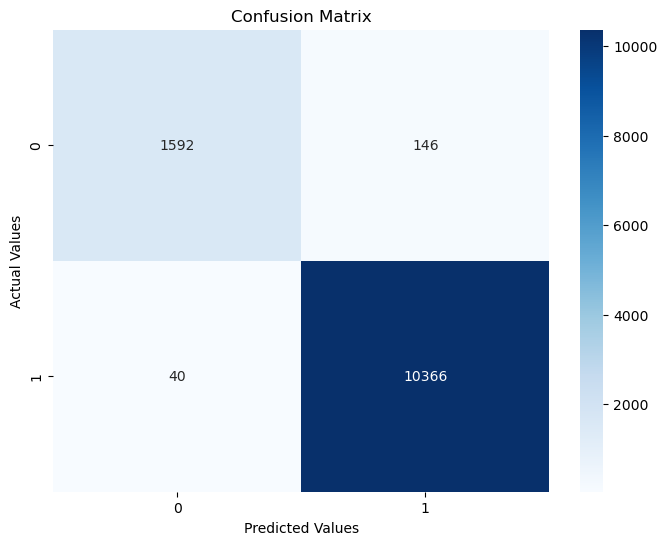

In [2359]:
cm=confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()